【6/1番にupdateしました。あたらしく公開されたvalidation dataの確認と合わせて読んでみてください】

This note is a Japanese translation of a great [eda work](https://www.kaggle.com/headsortails/back-to-predict-the-future-interactive-m5-eda).
Thank you [@Heads or Tails](https://www.kaggle.com/headsortails)! (Please, upvote great work!)

オリジナルは美しいインタラクティブ版です。是非、参照・upvoteしてください！

This [M5 Forecasting - Starter Data Exploration](https://www.kaggle.com/robikscube/m5-forecasting-starter-data-exploration) is also referenced.
Some of the code came from here.

Unfortunately I couldn't get my R notebook to work, so some changed to Python and others used the captured image, but it's not interactive.
The first part worked hard to convert R to Python, but gave up on the way. Due to the difference in smoothing coefficient, the Python conversion part did not result in a completely consistent graph.

If you find any mistranslations, other mistakes, or better code, please let me know.

I strongly hope that Kaggle notebook will be able to use google translation universally in the future. That way I don't need to do this kind of translation ...

Back to (predict) the future - Interactive M5 EDA
2020-06-01
- 1 Introduction
- 2 Preparations
- 3 Quick Look: File structure and content
- 4 Visual Overview: Time series plots
    - 4.1 Individual item-level time series - random sample
    - 4.2 All aggregate sales
    - 4.3 Sales per State
    - 4.4 Sales per Store & Category
    - 4.5 Sales per Department
    - 4.6 Seasonalities - global
- 5 Explanatory Variables: Prices and Calendar
    - 5.1 Calendar
    - 5.2 Item Prices
    - 5.3 Connection to time series data
- 6 Individual time series with explanatory variables
- 7 Summary statistics
- 8 One more thing: External Dataset of Natural Disasters

<div 
    style="background-image: url('https://images.unsplash.com/photo-1528399783831-8318d62d10e5?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=967&q=80'); 
    width:700px; 
    height:300px; 
    background-position:center;">&nbsp;
</div>

*Photo by Fabio Bracht (@bracht) on Unsplash.*

# 1 Introduction

第5回マクリダキス予測コンテスト（M5）の広範な探索的データ分析へようこそ！ このノートブックは、今後数日から数週間にわたって、この課題に関連するすべての側面を深く掘り下げていく予定です。 開始するために知っておくべきことは次のとおりです。

背景：予測の専門家である[Spyros Makridakis](https://en.wikipedia.org/wiki/Spyros_Makridakis)が主催する[Makridakisコンペティション](https://en.wikipedia.org/wiki/Makridakis_Competitions)（またはMコンペティション）は、明確に定義された現実世界の問題を解決するさまざまな方法の予測性能を比較することにより、予測手法の理解と進歩を促すことを目的としています。 最初のMコンペティションは1982年に開催されました。[4番目のコンペティション（M4）](https://www.sciencedirect.com/science/article/pii/S0169207019301128)は2018年に開催され、「10万個の時系列と61の予測方法」（先のリンク参照）が特徴でした。 予測研究者および実務家の[ロブ・ハイドマン](https://robjhyndman.com/hyndsight/)は、「モデルの数学的特性ではなくどのモデルが優れた予測をもたらしたかに注意を向けたことで、Mコンペティションは予測の分野に多大な影響を与えました 」と説明しています。この経験的アプローチは、最高の機械学習アルゴリズムを使用してさまざまなデータセットでコンペを行うKaggleと非常によく似ています。 M5はそのKaggleで開催される最初のMコンペティションになります。

目標：小売大手[ウォルマート](https://en.wikipedia.org/wiki/Walmart)が提供する販売データをもとに、そのデータ後28日間の販売データを予測することが目標です。 この競争は2つのトラックで実行されます。[予測コンペ](https://www.kaggle.com/c/m5-forecasting-accuracy/)で販売データ自体の予測をするのに加えて、同時に開催される[不確実性分布コンペ](https://www.kaggle.com/c/m5-forecasting-uncertainty)でその予測の不確実性を推定します。どちらのコンペも同じ28日間の予測期間になります。

データ：42,840の階層的時系列を扱います。 [データ](https://www.kaggle.com/c/m5-forecasting-accuracy/data)は、カリフォルニア（CA）、テキサス（TX）、およびウィスコンシン（WI）の3つの米国の州で取得されました。 ここで「階層的」とは、アイテムレベル、部門レベル、製品カテゴリレベル、および状態レベルなどのさまざまなレベルでデータを集約できることを意味します。 販売情報は2011年1月から2016年6月までです。販売数に加えて、価格、プロモーション、および休日に関するデータも提供されます。 ほとんどの時系列にはゼロ値が多く含まれている点に注意してください。

データは、3つの州の10の店舗で販売された3つのカテゴリーと7つの部門からなる3049個の個別の製品で構成されています。 階層集計は、これらの要因の組み合わせをキャプチャできます。 たとえば、すべての売上に対して1つの時系列を作成することもできますし、州ごとにすべての売上に対して3つの時系列を作成することもできます。 最大のものは10店舗ごとの全3049製品販売からなる30490個の時系列となります。

トレーニングデータは3つの個別ファイルで提供されます:
- sales_train.csv：これは主トレーニングデータです。 2011-01-29から2016-05-22の1941日ごとに1つの列があります。 2016-06-19までの28日間の検証期間は含まれません。 また、アイテム、部門、カテゴリ、ストア、および状態のIDも含まれます。 3049アイテムと10店舗のすべての組み合わせの行数は30490です。
- sell_prices.csv：ストアIDとアイテムID、およびアイテム販売価格の週平均。
- calendar.csv：日付、曜日、月、年と関連イベント、および三つの州がこの日に[SNAPフードスタンプ](https://www.benefits.gov/benefit/361)（訳者注：補助的栄養支援プログラム、無料フードクーポン）での購入を許可したかを示すバイナリフラグ（1:許可、0:不許可）。

メトリック：

ポイント予測の提出は、二乗平均平方根誤差（RMSSE）を使用して評価されます。RMSSEは、スケール不変で対称になるように設計された[平均絶対誤差（MASE）](https://en.wikipedia.org/wiki/Mean_absolute_scaled_error)から導出されます。 MASEと同様に、RMSSEはスケール不変で対称であり、ステップi =ステップi-1と単純に想定する「単純な予測」と比較して予測誤差（つまり、予測-真実）を測定します。 MASEとは対照的に、ここでは予測誤差と単純な誤差の両方がスケーリングされて、多くのゼロが存在する場合の平均値を推定するのに向いています。

不確実性分布の提出は、加重スケーリングピンボールロス（WSPL）を使用して[評価](https://www.kaggle.com/c/m5-forecasting-uncertainty/overview/evaluation)されます。不確実性間隔 50％、67％、95％、99％の予測中央値を提供することになります。

両方のメトリックは時系列ごとに計算され、すべての時系列で重み付きで平均化されます。 重みはアイテムの販売量（ドル単位）に比例し、売れ筋の製品をより重要視しています。注意：重みはトレーニングデータの最後の28日間に基づいており、その日付は、[主催者確認](https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/134244)の最終評価データに合わして調整されています。

インスピレーションが必要ですか？ このノートブックの他にも、[Wikiトラフィック予測](https://www.kaggle.com/c/web-traffic-time-series-forecasting)、[Favorita Grocery販売予測](https://www.kaggle.com/c/favorita-grocery-sales-forecasting/)、[Recruit Restaurant](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting)、[ASHRAE](https://www.kaggle.com/c/ashrae-energy-prediction/overview)など、最近の他Kaggle時系列コンペティションをチェックして、カーネルと上位にランクされる書き込みを読むことをお勧めします。 また数年前に、売上高を予測する2つのウォルマート採用コンペである[Recruiting 1](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview)と[Recruiting 2](https://www.kaggle.com/c/walmart-recruiting-sales-in-stormy-weather/overview)を実施しました。最後に、数年前に関連する[Playgroundコンペ](https://www.kaggle.com/c/demand-forecasting-kernels-only)がありました。

さあ始めましょう！

# 2 Preparations

In [1]:
import os
import numpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
from itertools import cycle
import seaborn as sns
import statsmodels.api as sm 
from scipy.interpolate import interp1d

pd.set_option('display.max_columns', 50)
plt.style.use('bmh')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
%%time
#oj = os.path.join
#INPUT_DIR = '../input/m5-forecasting-accuracy/

price = pd.read_csv('data/sell_prices.csv')
calender = pd.read_csv('data/calendar.csv')
train = pd.read_csv('data/trainset.csv')
sample_submit = pd.read_csv('data/submit.csv')

CPU times: total: 3.28 s
Wall time: 8.2 s


In [7]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 15.2 MB/s eta 0:00:00


In [13]:
# General imports
import numpy as np
import pandas as pd
import os, sys, gc, re, time, warnings, pickle, psutil, random

from math import ceil
import lightgbm as lgb
from typing import Union

warnings.filterwarnings('ignore')

In [15]:
########################### Helpers
#################################################################################
## Seeder
# :seed to make all processes deterministic     # type: int
def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)

## RMSE metric for occasions 
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [42]:
########################### Vars
#################################################################################
TARGET    = 'sales'    # Our Target     
END_TRAIN = 1913       # Last day of training set     
SEED      = 42         # Seed for deterministic processes  
seed_everything(SEED)  # Seeder

VERBOSE   = False      # Verbosity on all wrmsse levels   

remove_features = ['id','t_block','date','d', 'wm_yr_wk',TARGET]

In [44]:
########################### Metric and Evaluators
########################### get_evaluators(items_ids=None)
########################### items_ids -> list of subset of item_id 

In [46]:
########################### Init Metric
########################### https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/133834
#################################################################################
class WRMSSEEvaluator(object):

    def __init__(self, train_df: pd.DataFrame, valid_df: pd.DataFrame, calendar: pd.DataFrame, prices: pd.DataFrame):
        train_y = train_df.loc[:, train_df.columns.str.startswith('d_')]
        train_target_columns = train_y.columns.tolist()
        weight_columns = train_y.iloc[:, -28:].columns.tolist()

        train_df['all_id'] = 0

        id_columns = train_df.loc[:, ~train_df.columns.str.startswith('d_')].columns.tolist()
        valid_target_columns = valid_df.loc[:, valid_df.columns.str.startswith('d_')].columns.tolist()

        if not all([c in valid_df.columns for c in id_columns]):
            valid_df = pd.concat([train_df[id_columns], valid_df], axis=1, sort=False)

        self.train_df = train_df
        self.valid_df = valid_df
        self.calendar = calendar
        self.prices = prices

        self.weight_columns = weight_columns
        self.id_columns = id_columns
        self.valid_target_columns = valid_target_columns

        weight_df = self.get_weight_df()

        self.group_ids = (
            'all_id',
            'state_id',
            'store_id',
            'cat_id',
            'dept_id',
            ['state_id', 'cat_id'],
            ['state_id', 'dept_id'],
            ['store_id', 'cat_id'],
            ['store_id', 'dept_id'],
            'item_id',
            ['item_id', 'state_id'],
            ['item_id', 'store_id']
        )

        for i, group_id in enumerate(self.group_ids):
            train_y = train_df.groupby(group_id)[train_target_columns].sum()
            scale = []
            for _, row in train_y.iterrows():
                series = row.values[np.argmax(row.values != 0):]
                scale.append(((series[1:] - series[:-1]) ** 2).mean())
            setattr(self, f'lv{i + 1}_scale', np.array(scale))
            setattr(self, f'lv{i + 1}_train_df', train_y)
            setattr(self, f'lv{i + 1}_valid_df', valid_df.groupby(group_id)[valid_target_columns].sum())

            lv_weight = weight_df.groupby(group_id)[weight_columns].sum().sum(axis=1)
            setattr(self, f'lv{i + 1}_weight', lv_weight / lv_weight.sum())

    def get_weight_df(self) -> pd.DataFrame:
        day_to_week = self.calendar.set_index('d')['wm_yr_wk'].to_dict()
        weight_df = self.train_df[['item_id', 'store_id'] + self.weight_columns].set_index(['item_id', 'store_id'])
        weight_df = weight_df.stack().reset_index().rename(columns={'level_2': 'd', 0: 'value'})
        weight_df['wm_yr_wk'] = weight_df['d'].map(day_to_week)

        weight_df = weight_df.merge(self.prices, how='left', on=['item_id', 'store_id', 'wm_yr_wk'])
        weight_df['value'] = weight_df['value'] * weight_df['sell_price']
        weight_df = weight_df.set_index(['item_id', 'store_id', 'd']).unstack(level=2)['value']
        weight_df = weight_df.loc[zip(self.train_df.item_id, self.train_df.store_id), :].reset_index(drop=True)
        weight_df = pd.concat([self.train_df[self.id_columns], weight_df], axis=1, sort=False)
        return weight_df

    def get_scale(self, valid_preds: pd.DataFrame, lv: int) -> pd.Series:
        return getattr(self, f'lv{lv}_scale')
        
    def rmsse(self, valid_preds: pd.DataFrame, lv: int) -> pd.Series:
        valid_y = getattr(self, f'lv{lv}_valid_df')
        score = ((valid_y - valid_preds) ** 2).mean(axis=1)
        scale = getattr(self, f'lv{lv}_scale')       
        return (score / scale).map(np.sqrt)

    def score(self, valid_preds: Union[pd.DataFrame, np.ndarray]) -> float:
        assert self.valid_df[self.valid_target_columns].shape == valid_preds.shape

        if isinstance(valid_preds, np.ndarray):
            valid_preds = pd.DataFrame(valid_preds, columns=self.valid_target_columns)

        valid_preds = pd.concat([self.valid_df[self.id_columns], valid_preds], axis=1, sort=False)

        all_scores = []
        for i, group_id in enumerate(self.group_ids):
            lv_scores = self.rmsse(valid_preds.groupby(group_id)[self.valid_target_columns].sum(), i + 1)
            weight = getattr(self, f'lv{i + 1}_weight')
            lv_scores = pd.concat([weight, lv_scores], axis=1, sort=False).prod(axis=1)
            all_scores.append(lv_scores.sum())
        if VERBOSE:
            print(np.round(all_scores,3))
        return np.mean(all_scores)

    def full_score(self, valid_preds: Union[pd.DataFrame, np.ndarray]) -> float:
        assert self.valid_df[self.valid_target_columns].shape == valid_preds.shape

        if isinstance(valid_preds, np.ndarray):
            valid_preds = pd.DataFrame(valid_preds, columns=self.valid_target_columns)

        valid_preds = pd.concat([self.valid_df[self.id_columns], valid_preds], axis=1, sort=False)

        all_scores = []
        for i, group_id in enumerate(self.group_ids):
            lv_scores = self.rmsse(valid_preds.groupby(group_id)[self.valid_target_columns].sum(), i + 1)
            weight = getattr(self, f'lv{i + 1}_weight')
            lv_scores = pd.concat([weight, lv_scores], axis=1, sort=False).prod(axis=1)
            all_scores.append(lv_scores.sum())
        print(np.round(all_scores,3))
        return np.mean(all_scores)
    
class WRMSSEForLightGBM(WRMSSEEvaluator):

    def feval(self, preds, dtrain):
        preds = preds.reshape(self.valid_df[self.valid_target_columns].shape, order='F') #.transpose()
        score = self.score(preds)
        return 'WRMSSE', score, False
    
    def full_feval(self, preds, dtrain):
        preds = preds.reshape(self.valid_df[self.valid_target_columns].shape, order='F') #.transpose()
        score = self.full_score(preds)
        return 'WRMSSE', score, False
    
########################### Lgb evaluators
#################################################################################
def get_evaluators(items_ids):
    prices = pd.read_csv('data/sell_prices.csv')
    calendar = pd.read_csv('data/calendar.csv')
    train_fold_df = pd.read_csv('data/trainset.csv')
    train_fold_df = train_fold_df[train_fold_df['item_id'].isin(items_ids)].reset_index(drop=True)
    lgb_evaluators = []
    for i in range(2):
        temp_train = train_fold_df.iloc[:,:-28*(i+1)]
        if i==0:
            temp_valid = train_fold_df.iloc[:, -28*(i+1):]
        else:
            temp_valid = train_fold_df.iloc[:, -28*(i+1):-28*i]

        lgb_evaluator = WRMSSEForLightGBM(temp_train, temp_valid, calendar, prices)
        lgb_evaluators.append(lgb_evaluator)

    del train_fold_df, temp_train, temp_valid, prices, calendar
    return lgb_evaluators

In [61]:
########################### Model
#################################################################################
import lightgbm as lgb
lgb_params = {
                    'boosting_type': 'gbdt',                      
                    'metric': ['rmse'],           
                    'subsample': 0.5,                
                    'subsample_freq': 1,
                    'learning_rate': 0.05,           
                    'num_leaves': 2**8-1,            
                    'min_data_in_leaf': 2**8-1,     
                    'feature_fraction': 0.8,
                    'n_estimators': 1500,            
                    'early_stopping_rounds': 30,     
                    'seed': SEED,
                    'verbose': -1,
                } 

def make_fast_test(df, block=0, loss_func='tweedie'):
    df = df.copy()
    local_params = lgb_params.copy()           

    # To be sure that some features are categoricals
    icols = ['item_id','dept_id','cat_id','store_id','state_id', 
             'event_name_1','event_type_1','event_name_2','event_type_2',]
    for col in icols:
        try:
            df[col] = df[col].astype('category')
        except:
            pass
    
    # Our features
    features_columns = [col for col in list(df) if col not in remove_features]
    print(features_columns)
    
    train_mask = (df['t_block']<(df['t_block'].max()-block))
    valid_mask = (df['t_block']==(df['t_block'].max()-block))
    
    train_data = lgb.Dataset(df[train_mask][features_columns], label=df[train_mask][TARGET])
    valid_data = lgb.Dataset(df[valid_mask][features_columns], label=df[valid_mask][TARGET])
    
    print('Train time block', df[train_mask]['t_block'].max(), df[train_mask]['d'].min(), df[train_mask]['d'].max())
    print('Valid time block', df[valid_mask]['t_block'].max(), df[valid_mask]['d'].min(), df[valid_mask]['d'].max())
    
    temp_df = df[valid_mask]
    del df
    
    if loss_func=='custom':
        seed_everything(SEED)
        estimator = lgb.train(
                                local_params,
                                train_data,
                                valid_sets = [valid_data],
                                verbose_eval = 13,
                                fobj = custom_loss, 
                                feval=lgb_evaluators[block].feval,
                            )
        
    elif loss_func=='tweedie':
        local_params['objective'] = 'tweedie'             
        local_params['tweedie_variance_power'] = 1.1  
        seed_everything(SEED)
        estimator = lgb.train(
                                local_params,
                                train_data,
                                valid_sets = [valid_data],
                                verbose_eval = 13,
                                feval=lgb_evaluators[block].feval,
                            ) 
        
    else:
        local_params['objective'] = 'regression'             
        seed_everything(SEED)
        estimator = lgb.train(
                                local_params,
                                train_data,
                                valid_sets = [valid_data],
                                verbose_eval = 13,
                                feval=lgb_evaluators[block].feval,
                            )
        
    temp_df['preds'] = estimator.predict(temp_df[features_columns])
    temp_df = temp_df[['id','d',TARGET,'preds']]
    return estimator, temp_df

In [50]:
########################### Make grid
#################################################################################
grid_df = pd.concat([pd.read_pickle('data/grid_part_1.pkl'),
                     pd.read_pickle('data/grid_part_3.pkl').iloc[:,2:]],
                     axis=1)
grid_df['t_block'] = grid_df['d'].apply(lambda x: ceil((x+19)/(28))).astype(np.int8)
grid_df = grid_df[grid_df['d']<=END_TRAIN]
grid_df = grid_df[grid_df['t_block']>(grid_df['t_block'].max()-24)].reset_index(drop=True) #last 2 years
lgb_evaluators = get_evaluators(list(grid_df['item_id'].dropna().unique()))
gc.collect()

591

In [51]:
########################### Unrealistic lag 1+
#################################################################################
grouper = grid_df.groupby(['id'])[TARGET]
for i in range(1,8):
    print(i)
    grid_df['normal_lag_'+str(i)] = grouper.transform(lambda x: x.shift(i)).astype(np.float32)
    
del grouper

1
2
3
4
5
6
7


In [63]:
########################### Make simple model with tweedie
#################################################################################
model_tweedie, preds_tweedie_df = make_fast_test(grid_df, 0, 'tweedie')
print(lgb_evaluators[0].full_feval(preds_tweedie_df['preds'].values, pd.DataFrame())) 
lgb.plot_importance(model_tweedie, figsize=(15,15))

['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'release', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'tm_d', 'tm_w', 'tm_m', 'tm_y', 'tm_wm', 'tm_dw', 'tm_w_end', 'normal_lag_1', 'normal_lag_2', 'normal_lag_3', 'normal_lag_4', 'normal_lag_5', 'normal_lag_6', 'normal_lag_7']
Train time block 68 1242 1885
Valid time block 69 1886 1913


TypeError: train() got an unexpected keyword argument 'verbose_eval'

In [ ]:
########################### Some custom loss here
########################### The place to make own one
#################################################################################
def custom_loss(y_pred, y_true):
    grad = y_pred - y_true.get_label()
    hess = np.ones_like(y_pred)
    return grad, hess

In [ ]:
########################### Make simple model with custom loss
#################################################################################
model_custom, preds_custom_df = make_fast_test(grid_df, 0, 'custom')
print(lgb_evaluators[0].full_feval(preds_custom_df['preds'].values, pd.DataFrame())) 
lgb.plot_importance(model_custom, figsize=(15,15))

In [ ]:
########################### Lets test several folds
#################################################################################
all_preds = pd.DataFrame()
for i in [0,1]:
    model_tweedie, preds_tweedie_df = make_fast_test(grid_df, i, 'tweedie')
    all_preds = pd.concat([all_preds, preds_tweedie_df]).reset_index(drop=True) 
    print('-'*10)
    
all_preds

In [ ]:
########################### Lets test limited item ids
#################################################################################
keep_id = np.array_split(list(grid_df['item_id'].unique()), 20)[0]
lgb_evaluators = get_evaluators(keep_id)
temp_df = grid_df[grid_df['item_id'].isin(keep_id)]

all_preds = pd.DataFrame()
for i in [0,1]:
    model_tweedie, preds_tweedie_df = make_fast_test(temp_df, i, 'tweedie')
    all_preds = pd.concat([all_preds, preds_tweedie_df]).reset_index(drop=True) 
    print('-'*10)
    
all_preds

In [ ]:
########################### Lets do better item_id split
#################################################################################
from sklearn.model_selection import train_test_split

keep_id,_ = train_test_split(list(grid_df['item_id'].unique()), test_size=0.7, random_state=SEED)
lgb_evaluators = get_evaluators(keep_id)
temp_df = grid_df[grid_df['item_id'].isin(keep_id)]

all_preds = pd.DataFrame()
for i in [0,1]:
    model_tweedie, preds_tweedie_df = make_fast_test(temp_df, i, 'tweedie')
    all_preds = pd.concat([all_preds, preds_tweedie_df]).reset_index(drop=True) 
    print('-'*10)
    
all_preds

# 3 Quick Look: File structure and content

最初のステップとして、head、summaryを使ってデータセットを簡単に見ていきましょう。

トレーニング販売データの最初の5行は次のとおりです。

In [13]:
train.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  \
0       CA    0    0    0    0    0    0    0    0    0     0     0     0   
1       CA    0    0    0    0    0    0    0    0    0     0     0     0   
2       CA    0    0    0    0    0    0    0    0    0     0     0     0   
3       CA    0    0    0    0    0    0    0    0    0     0     0     0   
4       CA    0    0    0    0    0    0    0    0    0     0     0     0   

   d_13  d_14  d_15  d_16  d_17  d_18  d_19  ...  d_1903  d_1904  d_1905  \
0     0     0     0     0     0     0     0  ...       1       1       3   
1     0     0     0     0     0     0     0  ...       0       0       0   
2     0     0     0     0     0     0     0  ...       2       2       1   
3     0     0     0     0     0     0     0  ...       0       1       0   
4     0     0     0     0     0     0     0  ...       1       2       1   

   d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  d_1914  \
0       0       1       1       1       3       0       1       1       0   
1       0       0       0       1       0       0       0       0       0   
2       2       1       1       1       0       1       1       1       0   
3       5       4       1       0       1       3       7       2       0   
4       1       0       1       1       2       2       2       4       1   

   d_1915  d_1916  d_1917  d_1918  d_1919  d_1920  d_1921  d_1922  d_1923  \
0       0       0       2       0       3       5       0       0       1   
1       1       0       0       0       0       0       0       0       1   
2       0       1       1       0       2       1       0       0       0   
3       0       1       2       4       1       6       4       0       0   
4       0       2       3       1       0       3       2       3       1   

   d_1924  d_1925  d_1926  d_1927  
0       1       0       2       1  
1       0       0       0       0  
2       0       2       1       3  
3       0       2       2       4  
4       1       3       2       3  

[5 rows x 1933 columns]

気づいたこと：

item、department、category、store、stateのIDごとに1つの列があります。 さらに汎用idは他IDと検証用フラグの組み合わせです。
日付ごとの売上は、接頭辞d_で始まる列としてエンコードされています。 これらは1日あたりの販売数です（合計金額ではありません）。
すでにゼロ値がたくさんあることがわかります。
このデータセットには、列と行が多すぎてすべて表示できません。

In [14]:
train['id'].str.contains('validation').value_counts()

id
False    30490
Name: count, dtype: int64

すべてのIDは「valisation」としてマークされています。 これは最終的に予測する28日間とは別の、その前期間にあたるコンテスト初期検証テストだと言うことをしめしています。

このデータセットは、アイテムごとの週ごとの価格変更を示しています。

In [15]:
price.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [16]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [17]:
price.describe()

wm_yr_wk    sell_price
count  6.841121e+06  6.841121e+06
mean   1.138294e+04  4.410952e+00
std    1.486100e+02  3.408814e+00
min    1.110100e+04  1.000000e-02
25%    1.124700e+04  2.180000e+00
50%    1.141100e+04  3.470000e+00
75%    1.151700e+04  5.840000e+00
max    1.162100e+04  1.073200e+02

気づいたこと：

この価格表にはトレーニングデータと検証データにリンクするためのstore_idとitem_idが記述されています。
価格は$ 0.10から100ドルを少し超える範囲です。

カレンダーデータは、曜日、月、年などの日付機能を、2つの異なるイベント情報とSNAPフードスタンプフラグと共に提供します。

dateをdatetime型に変換しておきます。

In [18]:
calender['date'] = pd.to_datetime(calender['date'])

In [19]:
calender.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0 2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1 2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2 2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3 2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4 2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [20]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  162 non-null    object        
 8   event_type_1  162 non-null    object        
 9   event_name_2  5 non-null      object        
 10  event_type_2  5 non-null      object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


In [21]:
calender.describe()

date      wm_yr_wk         wday        month  \
count                 1969   1969.000000  1969.000000  1969.000000   
mean   2013-10-09 00:00:00  11347.086338     3.997461     6.325546   
min    2011-01-29 00:00:00  11101.000000     1.000000     1.000000   
25%    2012-06-04 00:00:00  11219.000000     2.000000     3.000000   
50%    2013-10-09 00:00:00  11337.000000     4.000000     6.000000   
75%    2015-02-13 00:00:00  11502.000000     6.000000     9.000000   
max    2016-06-19 00:00:00  11621.000000     7.000000    12.000000   
std                    NaN    155.277043     2.001141     3.416864   

              year      snap_CA      snap_TX      snap_WI  
count  1969.000000  1969.000000  1969.000000  1969.000000  
mean   2013.288471     0.330117     0.330117     0.330117  
min    2011.000000     0.000000     0.000000     0.000000  
25%    2012.000000     0.000000     0.000000     0.000000  
50%    2013.000000     0.000000     0.000000     0.000000  
75%    2015.000000     1.000000     1.000000     1.000000  
max    2016.000000     1.000000     1.000000     1.000000  
std       1.580198     0.470374     0.470374     0.470374

気づいたこと：

カレンダーには、関連するすべての日付、曜日、月、およびスナップバイナリフラグとイベント情報列があります。

event_name_2列には、NA以外の行が5行しかありません。 つまり、特定の日に複数のイベントが発生するのは（1969年から）5回のみです。

In [22]:
sample_submit.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1928  d_1929  d_1930  d_1931  d_1932  d_1933  d_1934  d_1935  \
0       CA       0       0       0       0       0       0       0       0   
1       CA       0       0       0       0       0       0       0       0   
2       CA       0       0       0       0       0       0       0       0   
3       CA       0       0       0       0       0       0       0       0   
4       CA       0       0       0       0       0       0       0       0   

   d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       0       0       0       0       0  
1       0       0       0       0       0       0  
2       0       0       0       0       0       0  
3       0       0       0       0       0       0  
4       0       0       0       0       0       0

セールストレーニングデータに欠損値はありません。

In [23]:
train.isnull().any().any()

False

ただし、ゼロ値は多数あります。ここでは、すべての時系列におけるゼロの割合の分布をプロットします。

In [24]:
d_cols = [c for c in train.columns if 'd_' in c] # d_で始まる日付列のリスト
length = len(d_cols) # d_で始まる日付列の長さ
zero_rate = (train == 0).sum(axis=1)/length

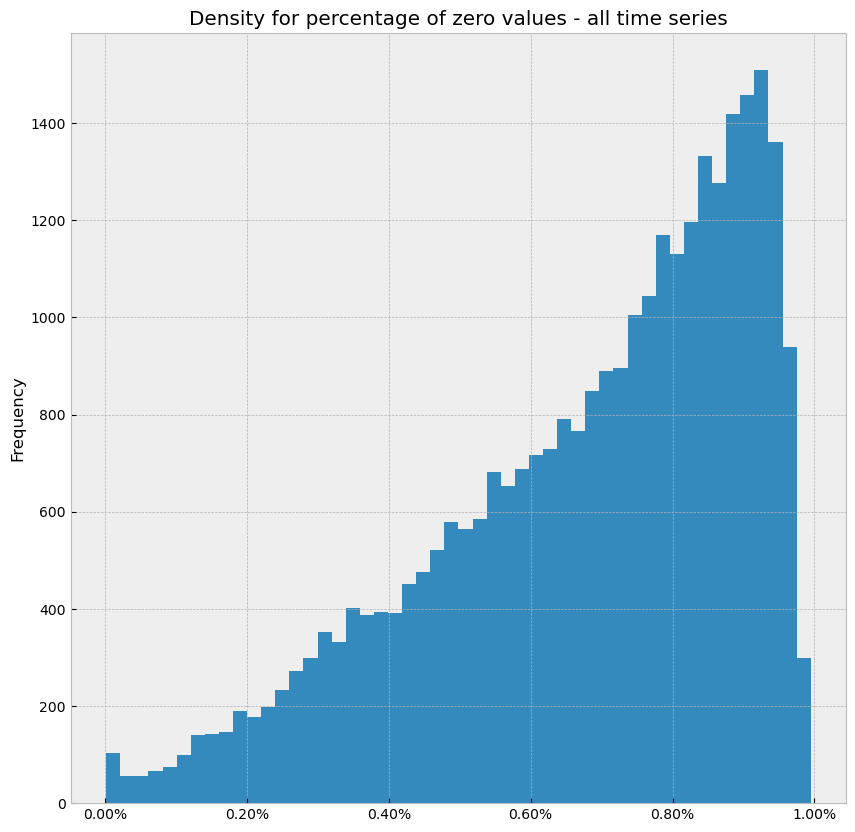

In [25]:
ax = zero_rate.plot(kind='hist', bins=50, title="Density for percentage of zero values - all time series", grid=True, figsize=(10, 10))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

これは、ゼロ値が少ない（50%以下）時系列は少数派だと言うことを意味しています。分布のピークはゼロ値含有率100%近辺です。

# 4 Visual Overview: Time series plots
さまざまな集計レベルの多数の時系列プロットを調査することから、視覚的な調査を開始します。 日付で表示するためデータフレームをマージします。

## 4.1 Individual item-level time series - random sample

In [26]:
# ランダムに抽出（個数、random_stateは任意）
ex = train.sample(6, random_state=5050)

In [27]:
# calenderとマージ
exT = ex.set_index('id')[d_cols].T.merge(calender.set_index('d')['date'],
                                         left_index=True,
                                         right_index=True,
                                         validate='1:1').set_index('date')

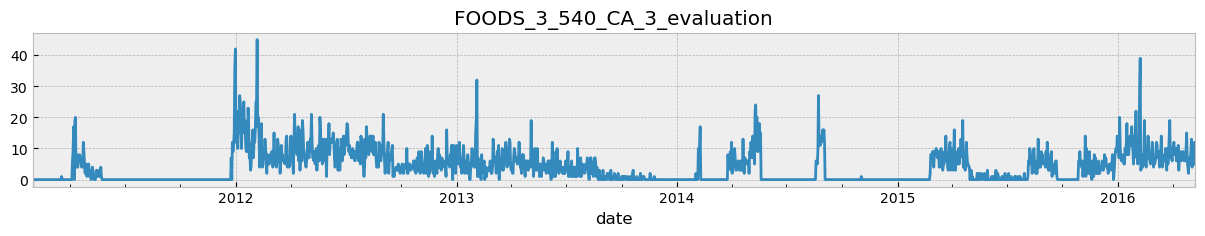

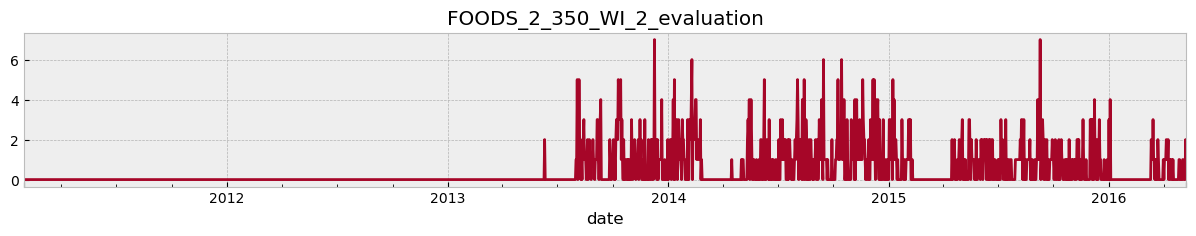

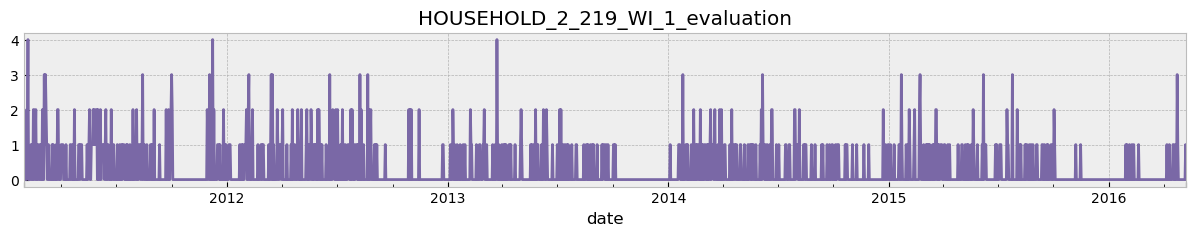

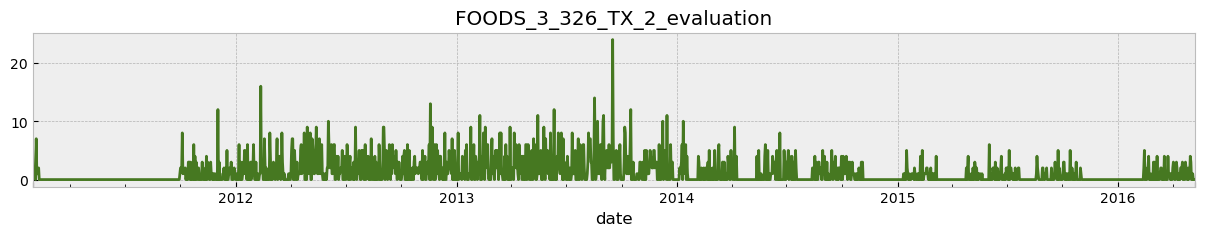

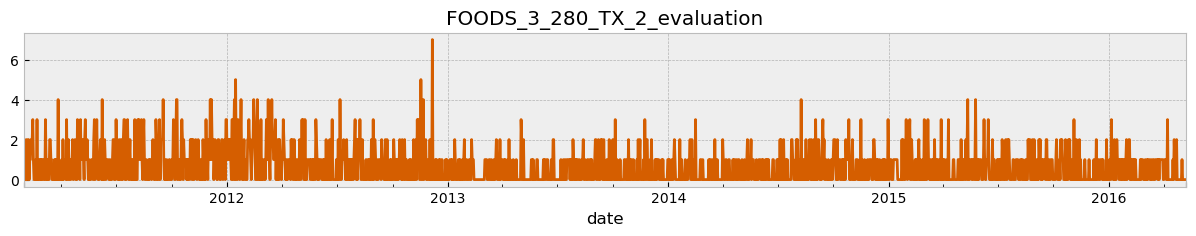

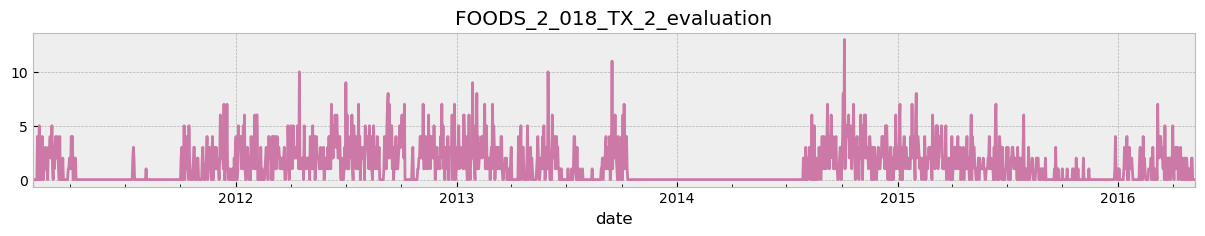

In [28]:
for item in exT.columns:
    exT[item].plot(title=item,
                   figsize=(15, 2),
                   color=next(color_cycle))
    plt.show()

気づいたこと：
* ほとんどの時系列は、すでに気付いているようにゼロ値の割合が高く、毎日統計カウントされる割合はとても低いです。 一方で、これはスパイクが過度にならないことを示唆しています。 しかしそれはまた、正確な予測のために非常に多くのノイズに対処する必要があることを示しています。
* 一部の時系列は、途中からに始まっていたり、長いギャップが存在します。これは追加の課題です。

## 4.2 All aggregate sales

個々の時系列を調べた結果、多くのゼロ値を見つけました。適切な統計を得るために集計を行っていきます。

まずここでは、すべての、アイテム、店舗、カテゴリ、部門、および売上の集計時系列をプロットします。 

In [29]:
past_sales = train.set_index('id')[d_cols].T.merge(calender.set_index('d')['date'],
                                                   left_index=True,
                                                   right_index=True,
                                                   validate='1:1').set_index('date')

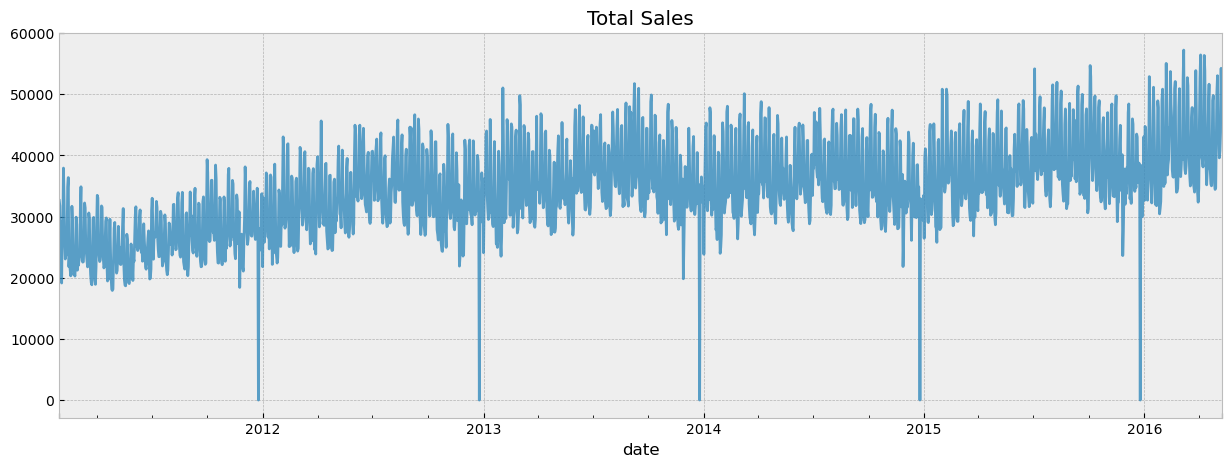

In [30]:
past_sales.sum(axis=1).plot(figsize=(15, 5), alpha=0.8, title='Total Sales')
plt.show()

気づいたこと：

ウォルマートにとっては朗報で、売り上げは全般的に上がっています。 年に一度の周期性があり、クリスマスは店舗が閉まっている唯一の日だと知ることができます。

拡大してみると、週ごとの強い周期性に加えて、年ごとよりも短い期間の追加のオーバーレイパターンがあるようです。

直近の2016年の販売数は、前年よりも少し速く成長しているようです。

## 4.3 Sales per State

これらの全体像のビューからもう少し情報を得るために、私たちは毎月の集計レベルで州ごとの売上高を見ていきます。 

In [31]:
state_list = train['state_id'].unique()
state_list

array(['CA', 'TX', 'WI'], dtype=object)

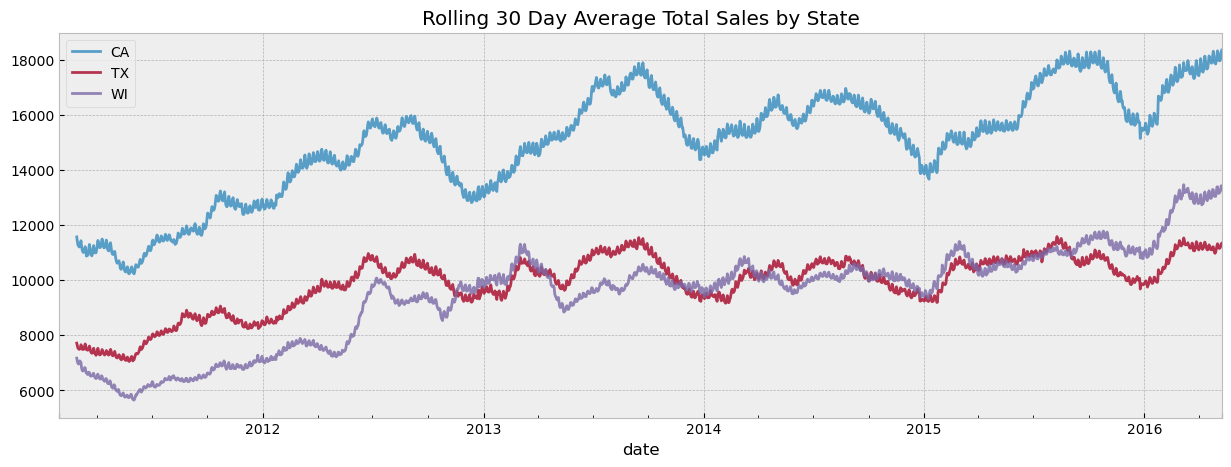

In [32]:
for i in state_list:
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .rolling(30).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 30 Day Average Total Sales by State')
plt.legend(train['state_id'].unique())
plt.show()

気づいたこと：

ウィスコンシン（WI）がゆっくりとテキサス（TX）に追いつき、最終的にトレーニングデータの最後の数か月でそれを上回りましたが、カリフォルニア（CA）は一般により多くのアイテムを販売しています。

CAは2013年と2015年に他の州にも存在するように見える落ち込みを示していますが、それほど深刻ではありません。これらの落ち込みとピークは常に発生するとは限りませんが（2012を参照）、すでに気付いた年間の周期性を反映している可能性があります。

## 4.4 Sales per Store & Category

店舗は10店舗あり、CAに4店舗、TXとWIに3店舗、カテゴリは食品(FOODS)、趣味(HOBBIES)、家庭(HOUSEHOLD)の3つです。

In [33]:
train['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [34]:
train.groupby('cat_id').count()['id']

cat_id
FOODS        14370
HOBBIES       5650
HOUSEHOLD    10470
Name: id, dtype: int64

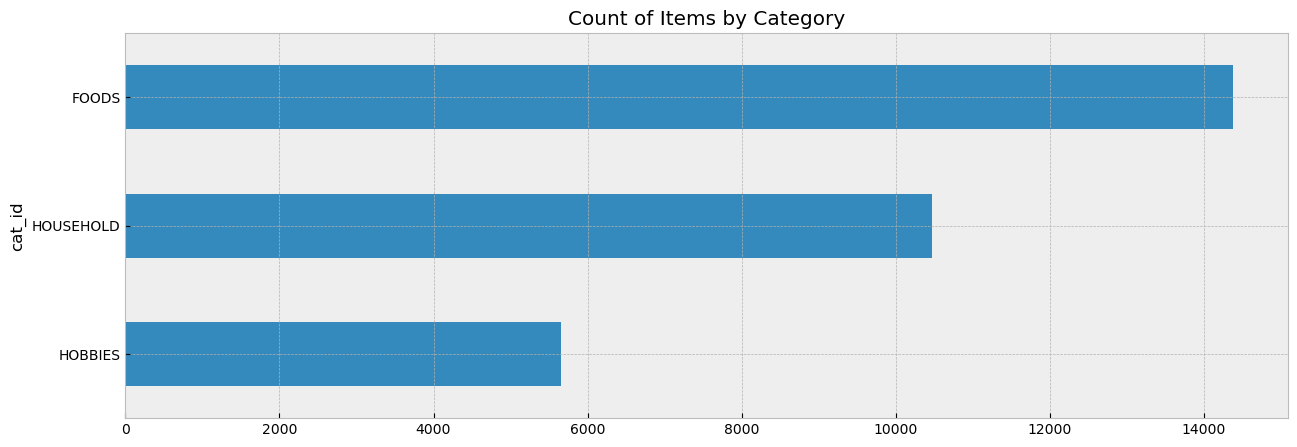

In [35]:
train.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

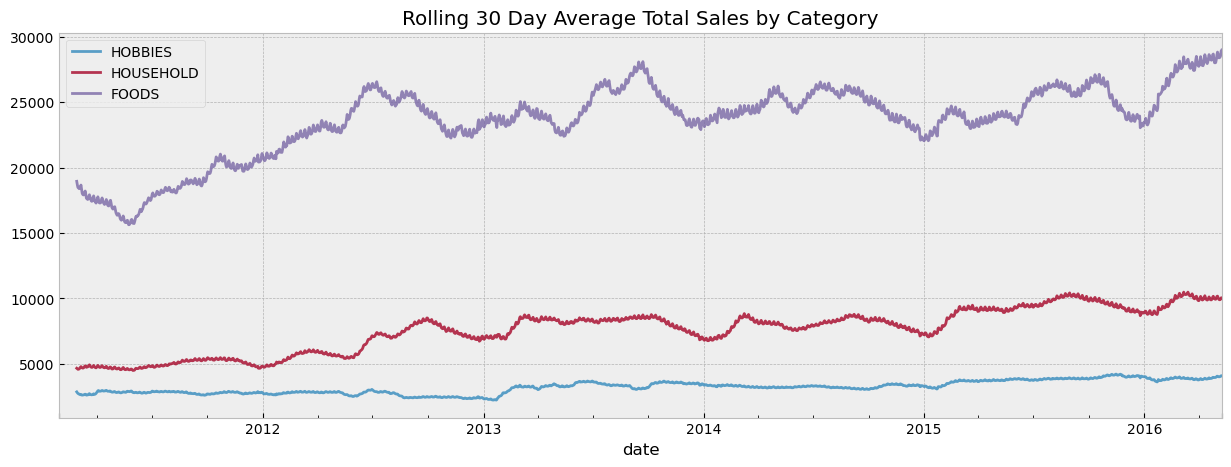

In [36]:

for i in train['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .rolling(30).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 30 Day Average Total Sales by Category')
plt.legend(train['cat_id'].unique())
plt.show()

In [37]:
store_list = price['store_id'].unique()
store_list

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [38]:
store_list_ca = [s for s in store_list if 'CA' in s]
store_list_tx = [s for s in store_list if 'TX' in s]
store_list_wi = [s for s in store_list if 'WI' in s]

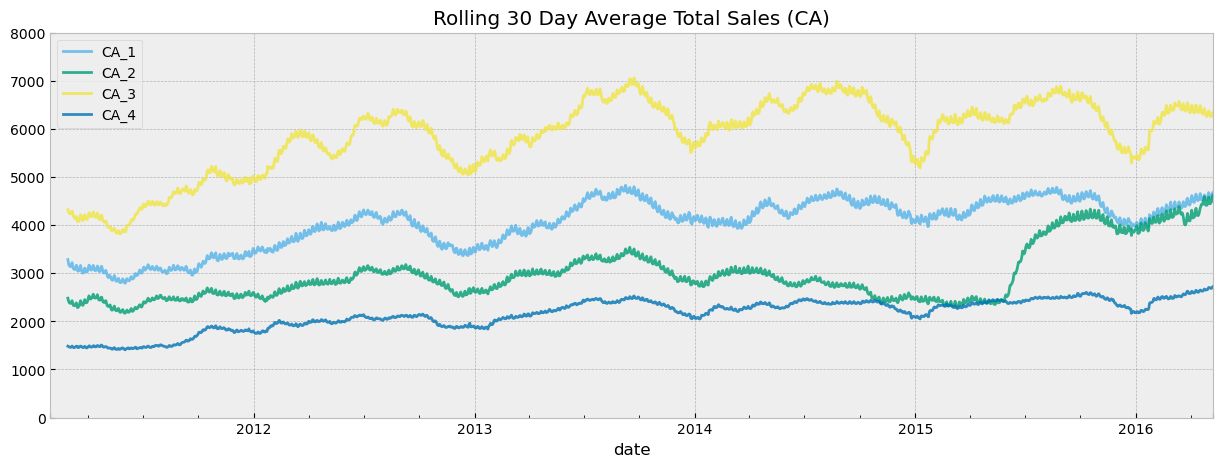

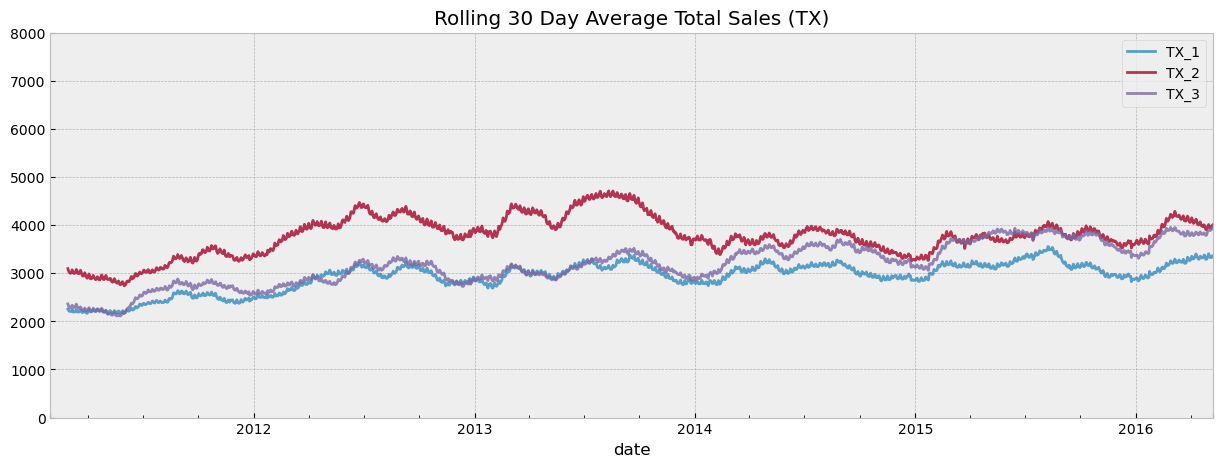

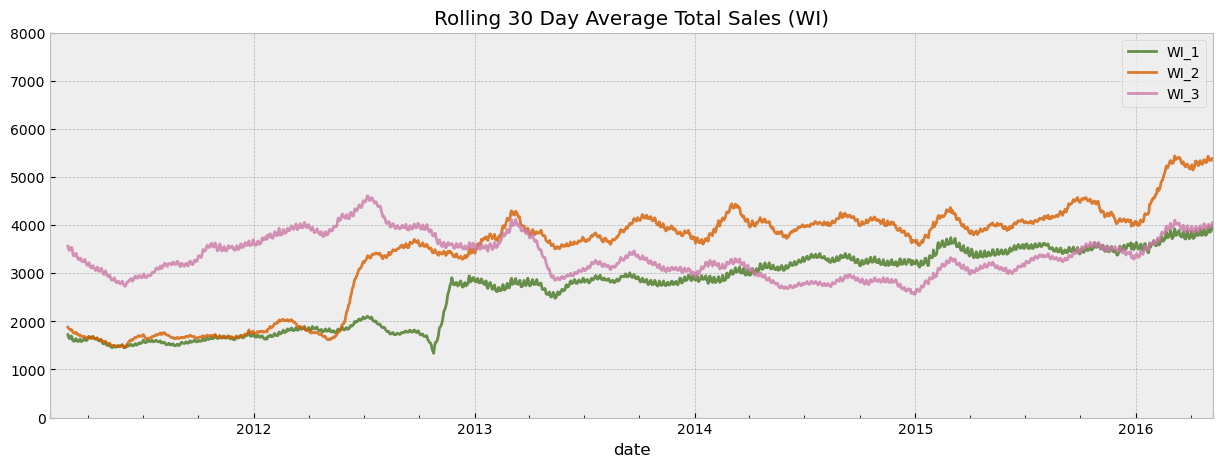

In [39]:
for s in store_list_ca:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(30).mean() \
        .plot(figsize=(15, 5),
              ylim=[0,8000],
              alpha=0.8,
            color=next(color_cycle),
              title='Rolling 30 Day Average Total Sales (CA)')
plt.legend(store_list_ca)
plt.show()

for s in store_list_tx:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(30).mean() \
        .plot(figsize=(15, 5),
              ylim=[0,8000],
              color=next(color_cycle),
              alpha=0.8,
              title='Rolling 30 Day Average Total Sales (TX)')
plt.legend(store_list_tx)
plt.show()

for s in store_list_wi:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(30).mean() \
        .plot(figsize=(15, 5),
              ylim=[0,8000],
              color=next(color_cycle),
              alpha=0.8,
              title='Rolling 30 Day Average Total Sales (WI)')
plt.legend(store_list_wi)
plt.show()

気づいたこと：

「FOODS」が最も一般的なカテゴリであり、「HOUSEHOLD」がそれに続き、「HOBBIES」をかなり上回っています。 「HOUSEHOLD」のアイテム数は、対応する売上高より「FOODS」の行の数に近く、「HOUSEHOLD」よりも「FOODS」の販売数が多いことを示しています。

店舗に関しては、TX州内店舗の売上はどれも非常に近いことがわかります。 「TX_3」は、トレーニングデータの期間中に「TX_1」のレベルから「TX_2」のレベルに上昇しています。 WIの店舗「WI_1」と「WI_2」は2012年に興味深い売上高贈を示していますが、「WI_3」は数年にわたる長い落ち込みを示しています。

CAのストアは、ストア規模で比較的よく分担されています。 2015年に「CA_2」は「CA_4」レベルに低下しますが、年内に回復して「CA_1」の売上高に跳ね上がっています。

## 4.5 Sales per Department

データには7つの部門があり、「FOODS」は3つ、「HOBBIES」と「HOUSEHOLD」はそれぞれ2つです。 3つの州と合わせて、全部で21種類になります。 

In [30]:
d_list = train['dept_id'].unique()

In [31]:
d_list_foods     = [d for d in d_list if 'FOODS' in d]
d_list_hobbies   = [d for d in d_list if 'HOBBIES' in d]
d_list_household = [d for d in d_list if 'HOUSEHOLD' in d]
d_list_h_h = d_list_hobbies + d_list_household

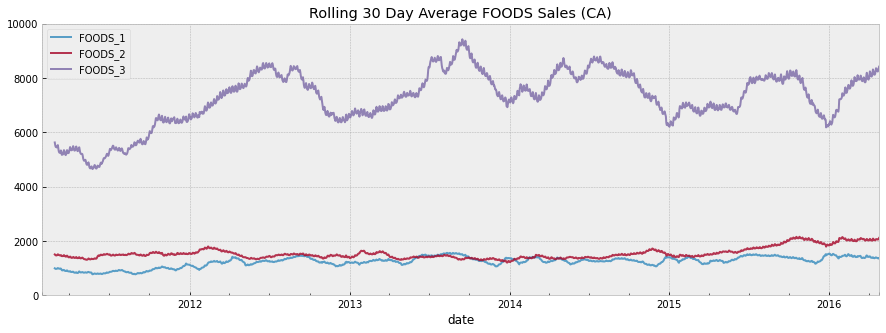

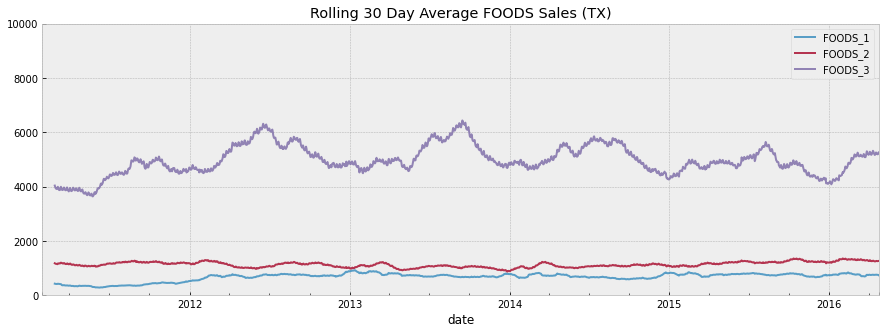

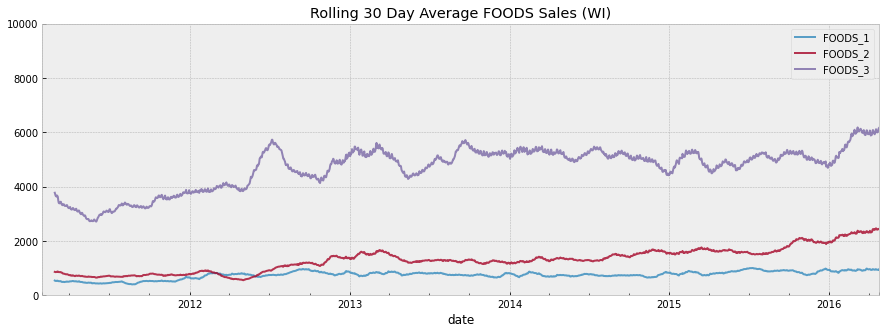

In [32]:
l = d_list_foods
for st in state_list:
    for d in l:
        store_items = [c for c in past_sales.columns if st in c]
        store_d_items = [s for s in store_items if d in s]
        past_sales[store_d_items] \
            .sum(axis=1) \
            .rolling(30).mean() \
            .plot(figsize=(15, 5),
                  ylim=[0,10000],
                  alpha=0.8,
                  title=f'Rolling 30 Day Average FOODS Sales ({st})')
    plt.legend(l)
    plt.show()

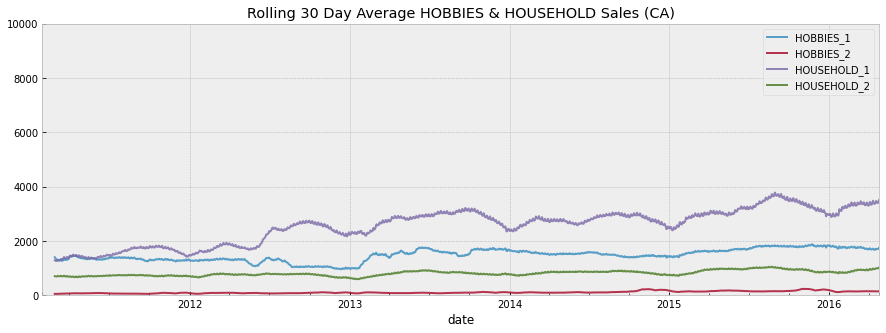

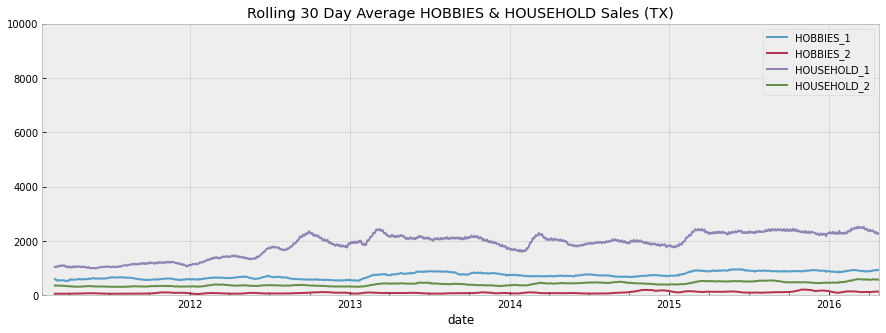

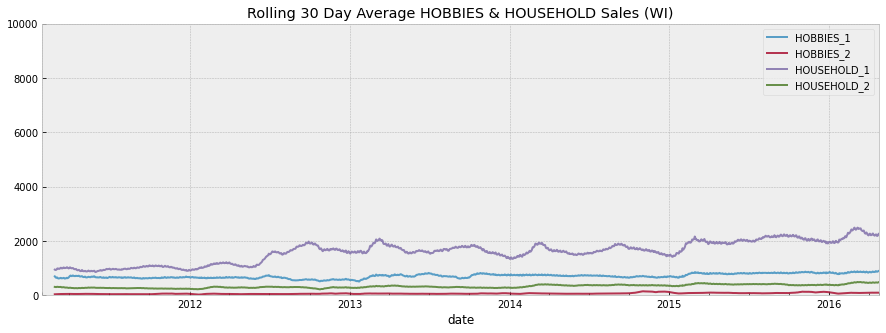

In [33]:
l = d_list_h_h
for st in state_list:
    for d in l:
        store_items = [c for c in past_sales.columns if st in c]
        store_d_items = [s for s in store_items if d in s]
        past_sales[store_d_items] \
            .sum(axis=1) \
            .rolling(30).mean() \
            .plot(figsize=(15, 5),
                  ylim=[0,10000],
                  alpha=0.8,
                  title=f'Rolling 30 Day Average HOBBIES & HOUSEHOLD Sales ({st})')
    plt.legend(l)
    plt.show()

気づいたこと：

「FOODS_3」は、すべての州で「FOODS」カテゴリの売上の大半を明確に牽引しています。 「FOODS_2」は、特に「WI」で、時間範囲の終わりに向かって少し上昇しています。

同様に「HOUSEHOLD_1」は「HOUSEHOLD_2」よりも明らかに売れ筋です。 「HOBBIES_1」は「HOBBIES_2」よりも平均販売レベルが高くなっていますが、どちらも時間の経過とともにあまり発展していません。

## 4.6 Seasonalities - global

時系列ビューから進んで、周期性を研究するためにビジュアルを変更していきます。 これは週次と年次の周期性を組み合わせたヒートマップです。

売上高は一般的に増加傾向にあるため、絶対的な売上高は考慮していません。 代わりに、平滑化（LOESS:訳注 ここではLOWESS:0.3を使いました）近似を使用してこの傾向をモデル化し、データから差し引きます。 ヒートマップは相対的な変化を示します。 この目的のため邪魔になるので、クリスマスディップを削除したことに注意してください。

In [34]:
def make_total_sales_lowess( p ):
    total_sales = pd.DataFrame(p.sum(axis=1), columns=['total sales'])
    
    # クリスマス削除
    total_sales_noXmas = total_sales.drop(index=[pd.datetime(2011,12,25), 
                                                 pd.datetime(2012,12,25), 
                                                 pd.datetime(2013,12,25), 
                                                 pd.datetime(2014,12,25), 
                                                 pd.datetime(2015,12,25)])

    df = total_sales_noXmas
    lowess = sm.nonparametric.lowess(df['total sales'], df.index, frac=.3) 
    lowess_x = list(zip(*lowess))[0] 
    lowess_y = list(zip(*lowess))[1] 
    
    f = interp1d(lowess_x, lowess_y, bounds_error=False)
    new_lowess_x = df.index
    new_lowess_y = f(new_lowess_x)
    
    total_sales_lowess = total_sales_noXmas
    total_sales_lowess['lowess'] = new_lowess_y
    total_sales_lowess['total sales-lowess'] = total_sales_lowess['total sales'] - total_sales_lowess['lowess']
    
    return total_sales_lowess
    

In [35]:
total_sales_lowess = make_total_sales_lowess( past_sales )

In [36]:
total_sales_lowess

total sales        lowess  total sales-lowess
date                                                     
2011-01-29        32631  23518.721723         9112.278277
2011-01-30        31749  23534.299264         8214.700736
2011-01-31        23783  23549.888498          233.111502
2011-02-01        25412  23565.489446         1846.510554
2011-02-02        19146  23581.102123        -4435.102123
...                 ...           ...                 ...
2016-04-20        35343  40569.191020        -5226.191020
2016-04-21        35033  40579.075220        -5546.075220
2016-04-22        40517  40588.962574          -71.962574
2016-04-23        48962  40598.853122         8363.146878
2016-04-24        49795  40608.746901         9186.253099

[1908 rows x 3 columns]

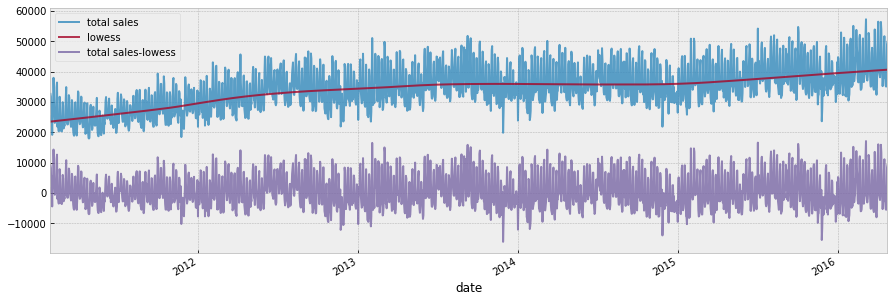

In [37]:
total_sales_lowess.plot(figsize=(15, 5), alpha=0.8)

In [38]:
df = total_sales_lowess.reset_index()
df['Month of the year'] = df['date'].dt.month
df['Day of the week']   = df['date'].dt.dayofweek
df

date  total sales        lowess  total sales-lowess  \
0    2011-01-29        32631  23518.721723         9112.278277   
1    2011-01-30        31749  23534.299264         8214.700736   
2    2011-01-31        23783  23549.888498          233.111502   
3    2011-02-01        25412  23565.489446         1846.510554   
4    2011-02-02        19146  23581.102123        -4435.102123   
...         ...          ...           ...                 ...   
1903 2016-04-20        35343  40569.191020        -5226.191020   
1904 2016-04-21        35033  40579.075220        -5546.075220   
1905 2016-04-22        40517  40588.962574          -71.962574   
1906 2016-04-23        48962  40598.853122         8363.146878   
1907 2016-04-24        49795  40608.746901         9186.253099   

      Month of the year  Day of the week  
0                     1                5  
1                     1                6  
2                     1                0  
3                     2                1  
4                     2                2  
...                 ...              ...  
1903                  4                2  
1904                  4                3  
1905                  4                4  
1906                  4                5  
1907                  4                6  

[1908 rows x 6 columns]

In [39]:
wm = df.pivot_table(index="Day of the week", columns="Month of the year", values="total sales-lowess")
wm

Month of the year           1            2            3            4   \
Day of the week                                                         
0                 -2601.254550  -822.557326 -1473.964818 -2130.870866   
1                 -6324.243067 -3404.712965 -3886.243885 -3507.061316   
2                 -6567.446862 -3386.911922 -4341.790705 -4110.293458   
3                 -5840.248005 -2866.536729 -3742.063433 -4045.895972   
4                 -1290.539102    57.329124   -49.625178   515.903051   
5                  8478.851300  9901.602755  8281.736062  8037.399519   
6                  5778.069564  8672.639544  8674.279978  7615.719419   

Month of the year           5            6            7            8   \
Day of the week                                                         
0                  -969.020343   601.941013  -396.874137   220.404908   
1                 -3858.371855 -2130.552515 -1695.121926 -2230.119388   
2                 -4638.017261 -2708.123922 -2021.567061 -2561.595257   
3                 -4312.353056 -2436.072539 -1134.183481 -2261.809748   
4                  -309.802176  2158.697753  2871.973462  2291.757210   
5                  5618.298435  7530.739326  6040.854017  8530.647805   
6                  4156.917985  7515.354918  6893.600007  9586.658761   

Month of the year           9            10           11           12  
Day of the week                                                        
0                   459.868883 -1403.669861 -3100.814941 -2217.649622  
1                 -3139.805965 -3807.703795 -4619.295006 -3857.816630  
2                 -3868.166165 -4423.812250 -4191.344265 -4038.417887  
3                 -3376.233399 -4244.451152 -7041.450398 -3279.008012  
4                   884.019232   318.785859 -2584.779862  -944.739117  
5                  8986.574195  8281.288246  5269.669138  4801.768105  
6                  9092.625903  8247.140945  6202.236438  3810.121438

In [40]:
wm = wm.sort_index(ascending=False)
wm = wm.rename(index={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
wm

Month of the year           1            2            3            4   \
Day of the week                                                         
Sun                5778.069564  8672.639544  8674.279978  7615.719419   
Sat                8478.851300  9901.602755  8281.736062  8037.399519   
Fri               -1290.539102    57.329124   -49.625178   515.903051   
Thu               -5840.248005 -2866.536729 -3742.063433 -4045.895972   
Wed               -6567.446862 -3386.911922 -4341.790705 -4110.293458   
Tue               -6324.243067 -3404.712965 -3886.243885 -3507.061316   
Mon               -2601.254550  -822.557326 -1473.964818 -2130.870866   

Month of the year           5            6            7            8   \
Day of the week                                                         
Sun                4156.917985  7515.354918  6893.600007  9586.658761   
Sat                5618.298435  7530.739326  6040.854017  8530.647805   
Fri                -309.802176  2158.697753  2871.973462  2291.757210   
Thu               -4312.353056 -2436.072539 -1134.183481 -2261.809748   
Wed               -4638.017261 -2708.123922 -2021.567061 -2561.595257   
Tue               -3858.371855 -2130.552515 -1695.121926 -2230.119388   
Mon                -969.020343   601.941013  -396.874137   220.404908   

Month of the year           9            10           11           12  
Day of the week                                                        
Sun                9092.625903  8247.140945  6202.236438  3810.121438  
Sat                8986.574195  8281.288246  5269.669138  4801.768105  
Fri                 884.019232   318.785859 -2584.779862  -944.739117  
Thu               -3376.233399 -4244.451152 -7041.450398 -3279.008012  
Wed               -3868.166165 -4423.812250 -4191.344265 -4038.417887  
Tue               -3139.805965 -3807.703795 -4619.295006 -3857.816630  
Mon                 459.868883 -1403.669861 -3100.814941 -2217.649622

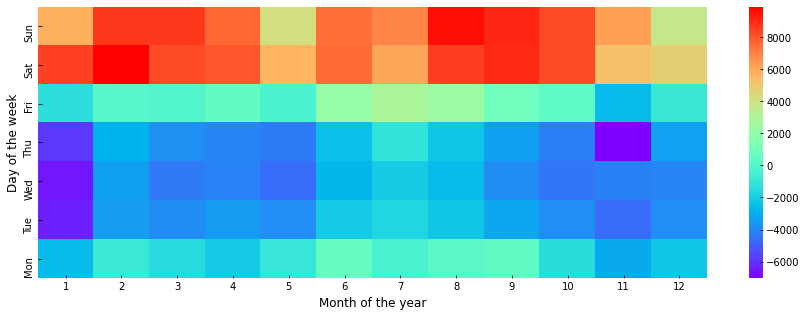

In [41]:
plt.figure(figsize=(15, 5)) 
sns.heatmap(wm, cmap='rainbow')

気づいたこと：

週ごとのパターンは強く土曜日と日曜日が際立っています。また、月曜日は週末の影響からか少し売り上げが良いようです。

11月と12月は明確な落ち込みを示していますが、夏の5月、6月、7月は穏やかな落ち込みを示しています。 7月4日（米国独立記念日）などの特定の祝日は、これらのパターンに多少影響する可能性があります。しかし、5年を超えると、平均はリーズナブルになるでしょう。

スムージングフィットパラメーターは、おそらくさらに最適化することができます。それでも最初のトライアルとしてはかなりよさそうです。

もう少しだけ周期性の話を続け、さらに一層を理解を深めていきましょう。

次に州レベルでの毎週および毎月のパターンを見ていきます。先と同じスムージングアプローチを使用しています。ここでは、3つの状態をより適切に比較できるように、個々の時系列をそのグローバル平均でスケーリングします。

### Sales per State with Seasonalities

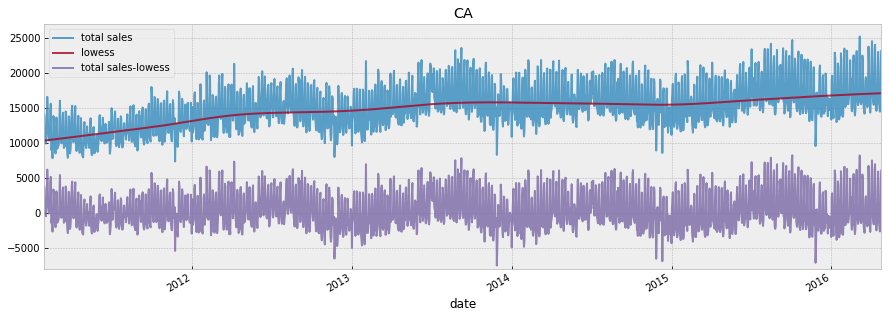

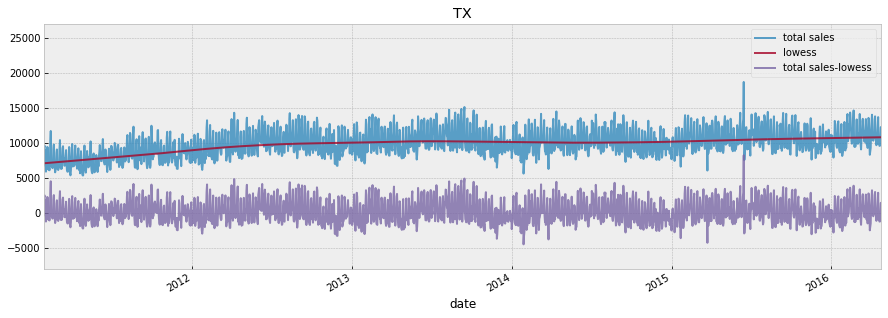

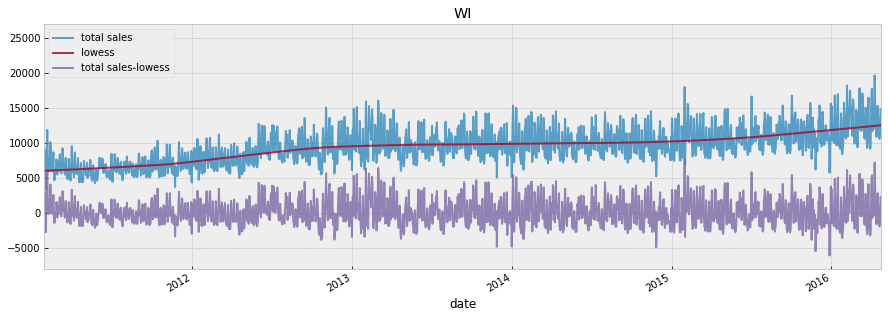

In [42]:
total_sales_lowess_ca = make_total_sales_lowess( past_sales.loc[:, past_sales.columns.str.contains('CA')] )
total_sales_lowess_ca.plot(figsize=(15, 5), alpha=0.8, ylim=[-8000,27000],title='CA')

total_sales_lowess_tx = make_total_sales_lowess( past_sales.loc[:, past_sales.columns.str.contains('TX')] )
total_sales_lowess_tx.plot(figsize=(15, 5), alpha=0.8, ylim=[-8000,27000],title='TX')

total_sales_lowess_wi = make_total_sales_lowess( past_sales.loc[:, past_sales.columns.str.contains('WI')] )
total_sales_lowess_wi.plot(figsize=(15, 5), alpha=0.8, ylim=[-8000,27000],title='WI')

In [43]:
def make_w_m(tsl):
    df = tsl.reset_index()
    df['Month of the year'] = df['date'].dt.month
    df['Day of the week']   = df['date'].dt.dayofweek
    w = df.pivot_table(index="Day of the week", values="total sales-lowess")
    m = df.pivot_table(index="Month of the year", values="total sales-lowess")
    
    return w, m

In [44]:
def plot_cat(past_sales, cat):
    if cat == 'TOTAL':
        p = past_sales
    else:
        p = past_sales.loc[:, past_sales.columns.str.contains(cat)]
    
    tsl_ca = make_total_sales_lowess( p.loc[:, p.columns.str.contains('CA')] )
    tsl_tx = make_total_sales_lowess( p.loc[:, p.columns.str.contains('TX')] )
    tsl_wi = make_total_sales_lowess( p.loc[:, p.columns.str.contains('WI')] )

    wca, mca = make_w_m(tsl_ca)
    wtx, mtx = make_w_m(tsl_tx)
    wwi, mwi = make_w_m(tsl_wi)

    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(wca, label='CA')
    ax.plot(wtx, label='TX')
    ax.plot(wwi, label='WI')
    ax.legend()
    ax.set_title(f'Weekly Seasonality : {cat}')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(mca, label='CA')
    ax.plot(mtx, label='TX')
    ax.plot(mwi, label='WI')
    ax.legend()
    ax.set_title(f'Monthly Seasonality : {cat}')
    plt.show()

    return

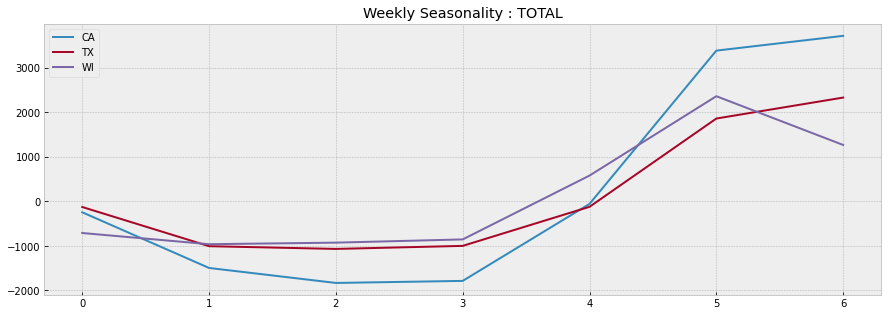

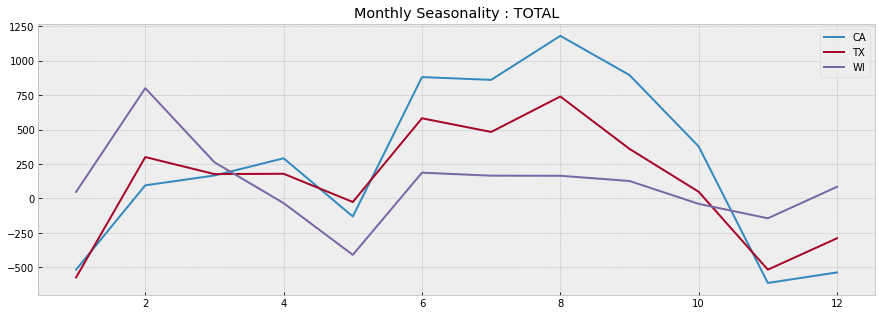

In [45]:
plot_cat(past_sales, 'TOTAL')

### Weekly and Manthly Seasonality by Category and State

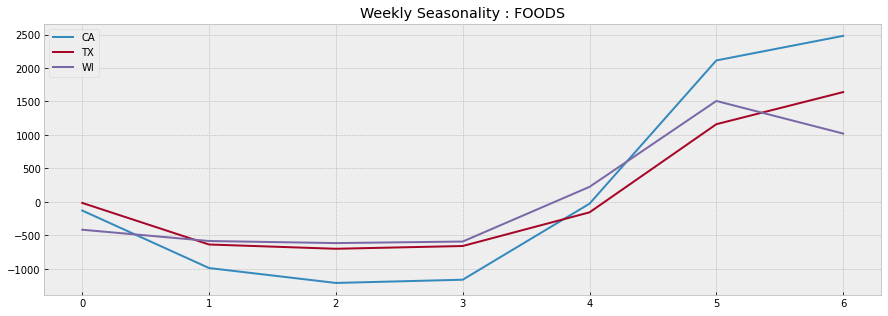

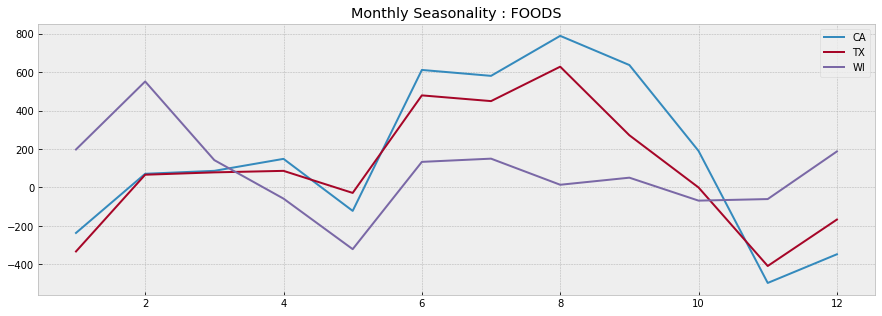

In [46]:
plot_cat(past_sales, 'FOODS')

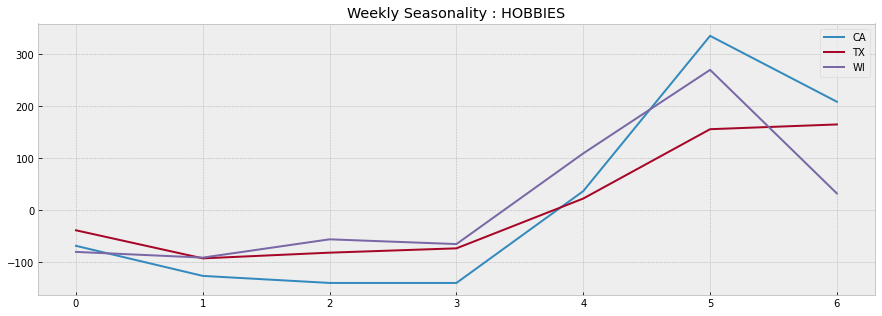

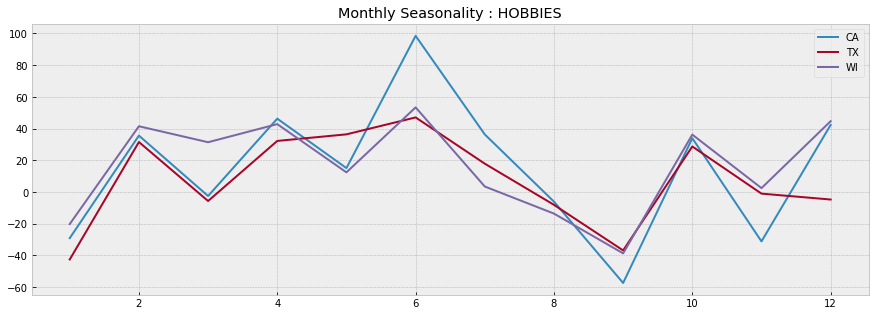

In [47]:
plot_cat(past_sales, 'HOBBIES')

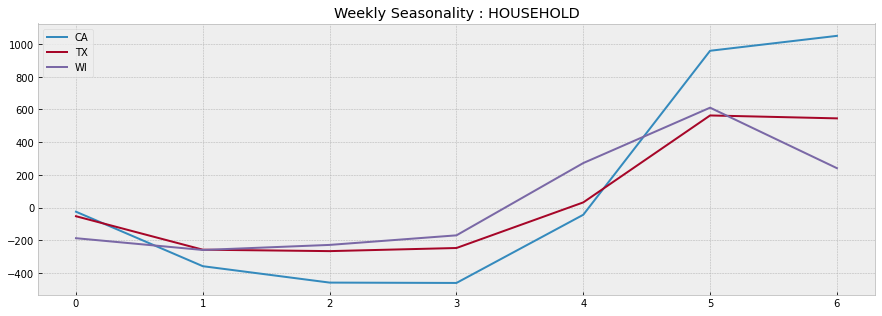

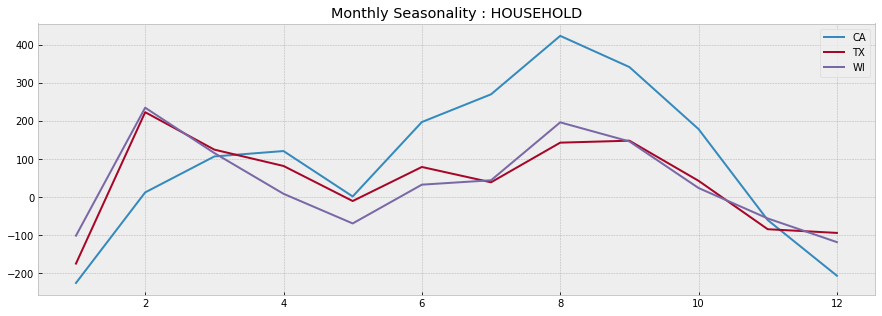

In [48]:
plot_cat(past_sales, 'HOUSEHOLD')

In [49]:
def original_image(png, figsize=(15,15)):
    img = mpimg.imread(png)
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')
    ax.set_title('original image')
    imgplot = ax.imshow(img)

    return

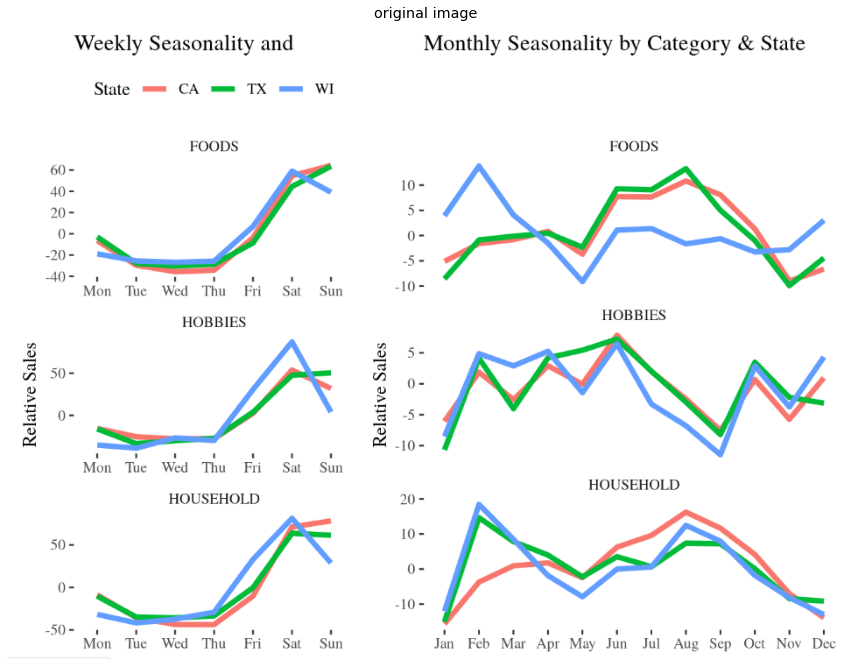

In [50]:
original_image('../input/figures/seasonality_by_cat.png')

気づいたこと：

「FOODS」カテゴリの毎週のパターンは3つの州すべてで非常に近く、WIは「HOBBIES」と「HOUSEHOLD」の偏差を示しています。 また、3つのカテゴリすべてについて、ウィスコンシンの特徴的な日曜日の落ち込みも確認できます。

毎月のパターンはいくつかの興味深い特徴を示しています。「FOODS」の場合、CAとTXはかなり近いようですが、WIは夏と冬の比率が逆転していることを示しています。 対照的に、「HOBBIES」のカテゴリーでは、3つの州は互いに非常に似ています。 また「HOUSEHOLD」の商品に関しては、CAは1年の最初の3か月間はそれほど多くを販売していないようですが、夏にはわずかに増加しています。 WIおよびTXと比較して。

追加の説明変数を見る前に、トレーニングデータと検証データ（パブリックリーダーボード）と評価データ（最終的なプライベートリーダーボード）の違いを視覚的に見ていきます。

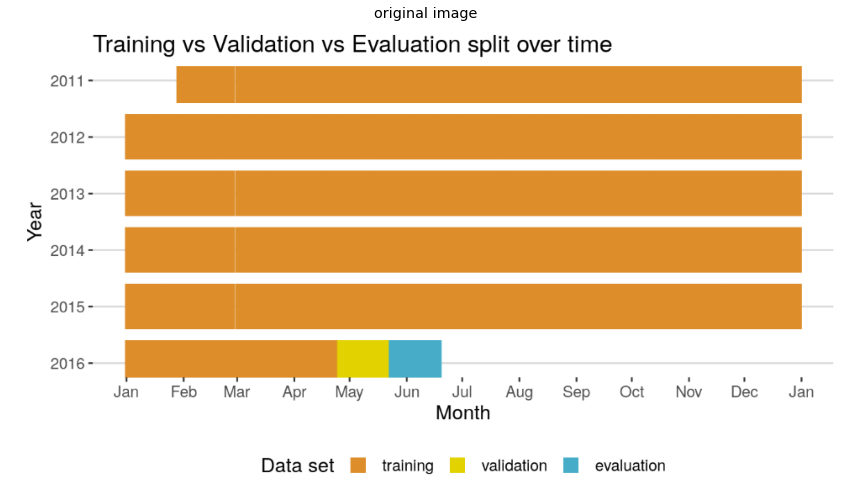

In [51]:
original_image('../input/figures/overtime.png')

これは5年間のTraining期間、ValidationおよびEvaluationのそれぞれ28日間を示しています。

Training期間は、2011年1月29日から2016年4月24日までです。 Validation期間は、2016年4月25日から2016年5月22日までの28日間です。 最初の公開リーダーボードでこの期間を予測します。 最終Evaluationでモデルをトレーニングするために、この期間のGround Truthも与えられます。

Evaluation期間は2016-05-23から2016-06-19の28日間です。これが最終スコアリングのベースになります。

# 5 Explanatory Variables: Prices and Calendar

このセクションでは、追加提供されている説明変数のアイテム価格とカレンダーイベントに焦点を当てます。 カレンダー機能に関しては、前のセクションで、日付から派生した曜日や月などのいくつかのパラメーターをすでに使っています。 これらのデータセットの基本的な特性を調べた後、時系列データに接続します。

## 5.1 Calendar

アイテム価格表には、いくつかのカレンダー機能が必要なので、それから始めましょう。

セクション3.3のクイックビューでは、カレンダーデータフレームに、曜日（文字列の曜日および整数列のwdayとして）、月、年、およびもちろん日付などの基本的な機能が含まれていることがわかります。日付をトレーニングデータの列名にリンクするd列もあります。 （カレンダーファイルを使用して列名から日付に変換することもできます。）

その他の機能はイベントとフードスタンプ情報です。

セクション3.3を見てください。列event_name_2およびevent_type_2において非NAは5つしかありません。したがって、ここではそれらを無視し、event _ * _ 1機能のみに焦点を当てます。

略語SNAPは補足栄養補助プログラムの略です。以下は彼らのウェブサイトからコピーしてきました：「補足栄養補助プログラム（SNAP）は最大の連邦栄養補助プログラムです。 SNAPは、Electronic Benefits Transferカードを介して、適格な低所得の個人や家族にメリットを提供します。このカードは、デビットカードのように使用して、認可された小売食品店で適格な食品を購入できます。」

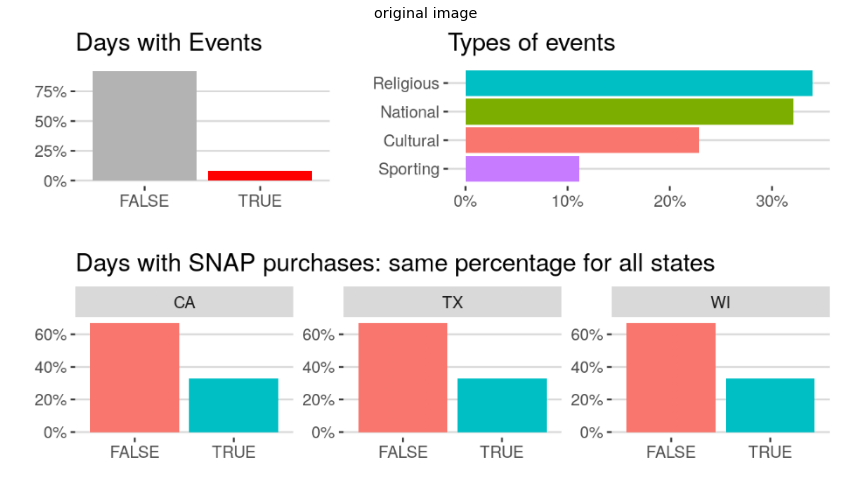

In [52]:
original_image('../input/figures/event_snap.png')

気づいたこと：

カレンダーのカバレッジ（Training+Validation+Evaluation）では、約8％の日に特別なイベントがあります。 これらのイベントのうち、約3分の1は宗教的（例：クリスマス）または国民の祝日（例：独立記念日）です。 残り3分の1のうち、2/3が文化イベント（バレンタインデーなど）、1/3がスポーツイベント（スーパーボウルなど）に分けられます。

WalmartストアでSNAPフードスタンプを使用した購入が許可されている日数の割合を見ると、3つの州でまったく同じであることがわかります（650日または33％）。これは注目に値します。

SNAPを少し見て、別のカレンダービューを見ていきましょう。 ここでは、各月の曜日を行として、月の週を列として表示しています。 基本的に、カレンダーが年ビューとして表示されています。次にSNAP日をオレンジ色にして、各州を比較表示します。

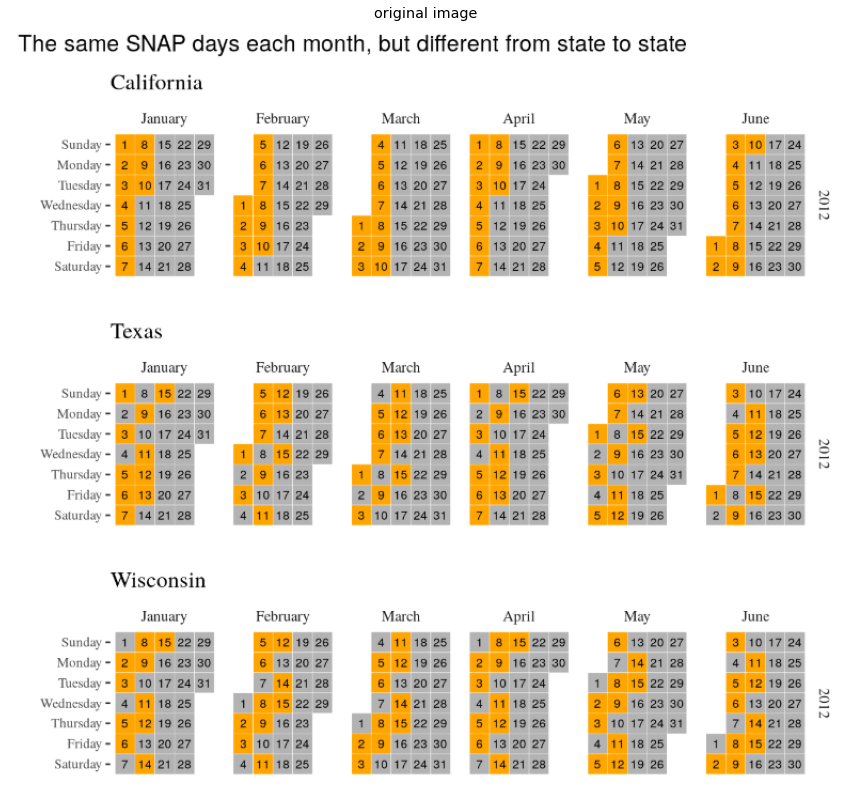

In [53]:
original_image('../input/figures/snap_days.png')

これはプロットを扱いやすくするための2012年の最初の6か月のみですが、パターンは常に同じです。

SNAP日は各月の同じ日です。それらは常に10日あり、実施日は州ごとに異なります。CAの場合は1〜10日、TXの場合は2〜4、8、10、14を除いた1〜15日、WIの場合は4, 7, 10, 13を除いた2〜15日。

これら3つの州のSNAP日はすべて毎月の前半15日までに行われます。SNAPの影響を測定することは、予測をより精度良くするのに役立つでしょう。

# 5.2 Item Prices

カテゴリーIDと部門IDを含む各アイテムIDと、州IDを含むそのストアIDのアイテム価格情報があります。 まず、いくつか概要を見てみましょう。

これはカテゴリ、部門、州のグループ内の価格分布の重複する密度プロットです。 x軸は対数スケールになっています。

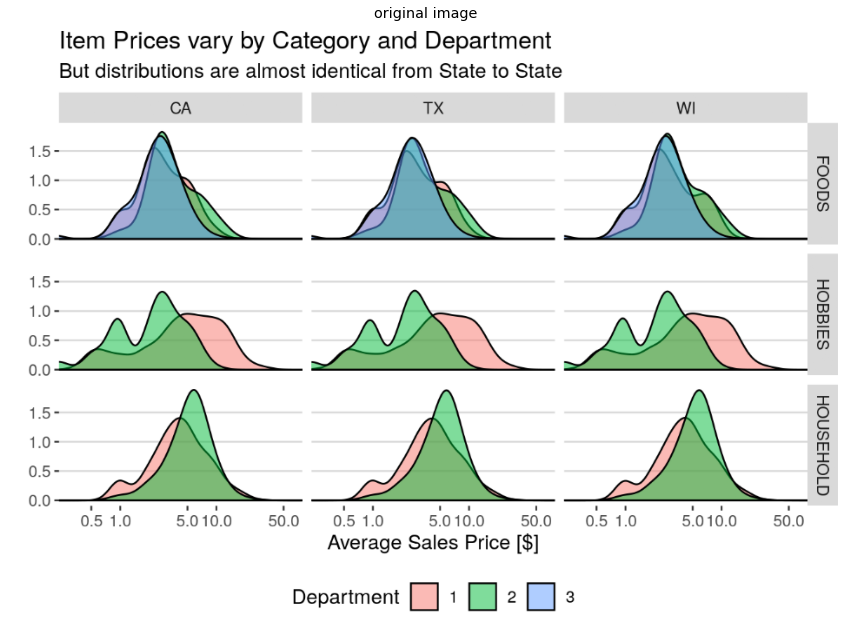

In [54]:
original_image('../input/figures/price_by_cat.png')

気づいたこと：

まず3つの州の分布はほぼ同じです。「FOODS」カテゴリには若干の違いがありますが、これは平滑化帯域幅サイズ(smoothing bandwidth size)が原因である可能性があります。実戦的には価格分布をすべて同等として扱うことができると思います。

カテゴリー間には顕著な違いがあります：「FOODS」は平均して「HOUSEHOLD」アイテムより安いです。また、「HOBBIES」商品は他の2つよりも価格範囲が広くなっています。低価格帯に2番目のピークが存在します。

カテゴリー内(部門間)にも、大きな違いがあります。

「FOODS」カテゴリ内3部門では、部門3（つまり、「FOODS_3」）には高価格帯が含まれていません。

「HOBBIES」カテゴリは最も多様なカテゴリであり、2部門とも非常に幅広い分布を持っていますが、「HOBBIES_1」は$10以上の占める割合が多いです。「HOBBIES_2」はバイモーダル構造(2つの主要因が共存)です。

HOUSEHOLDの価格分布はよく似ていますが、「HOUSEHOLD_2」は「HOUSEHOLD_1」よりも明らかに高い価格でピークを示しています。

価格は週平均として提供されています。週ID wm_yr_wkは、同じ名前のカレンダー列を使用して日付（および売上高）にリンクできます。

ここでは2011年から2016年までの各年のカテゴリおよび部門ごとのアイテム価格分布を、重なり合う密度グラフとして生成します。ggridgesパッケージのリッジラインプロットを使用しています。

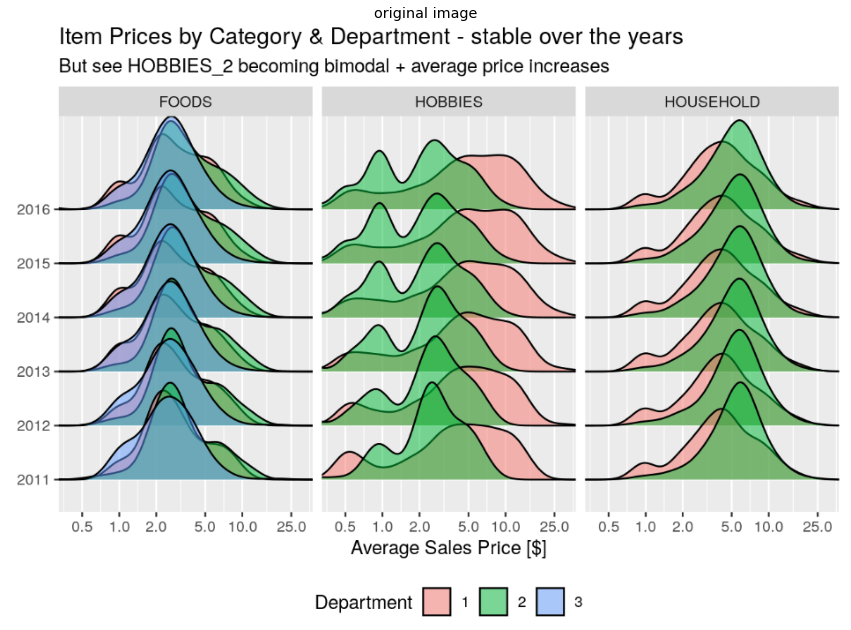

In [55]:
original_image('../input/figures/price_by_cat_years.png')

気づいたこと：

全体として価格分布は長年にわたってかなり安定しており、インフレが原因と思われるわずかな上昇のみが存在します。 このプロットでは右へのシフトがよく見えるように、垂直のグリッド線を持った灰色の背景を残しました（x軸のスケールが対数であることを思い出しておいてください）。 HOBBIES_1で最もよくシフトが現れています。

HOBBIES_2には興味深い変化が見られます。これは時間の経過とともに二峰性になります。$1近辺の2番目に大きなピークは、2ドルをわずかに超える最大ピークのレベルにほぼ達するまで重要度がましています。 同時に、HOBBIES_1の0.5ドル近辺の小さな2番目のピークは、2012年以降、フラットになります。

「HOUSEHOLD」部門は安定しています。 FOODSは、FOODS_1の$1近辺にピークが現れてくるような小さな変化を示しています。

# 5.3 Connection to time series data

これで説明変数がわかったので、それらが時系列データにどのように影響するか見ていきましょう。

ここでは時系列データの特性を集計レベルで見ていきます。 次のセクションでは個々の時系列データを見ていく予定です。

まず、これは、3つのカテゴリーの「FOODS」、「HOBBIES」、および「HOUSEHOLD」の特別イベント日(TRUE)と非イベント日(FALSE)の数日間の販売量を包括的にまとめたものです。 毎日の時系列をバックグラウンドで表示していますが、平滑化されたラインチャートを見るとよりわかりやすくなります。 平滑化ライン（スムージングフィット）はカテゴリごとの販売量と全体販売量（破線）に対して作っています。 この全体平準化ラインを使用して2つの下部パネルの相対売上高を計算しています。 右下のパネルでは、イベントのある日だけに注目して、4つの異なるタイプのイベントの売上中央値を示しています。 2つの下部パネルは同じy軸を共有しています。

時間をかけてじっくり理解してください：

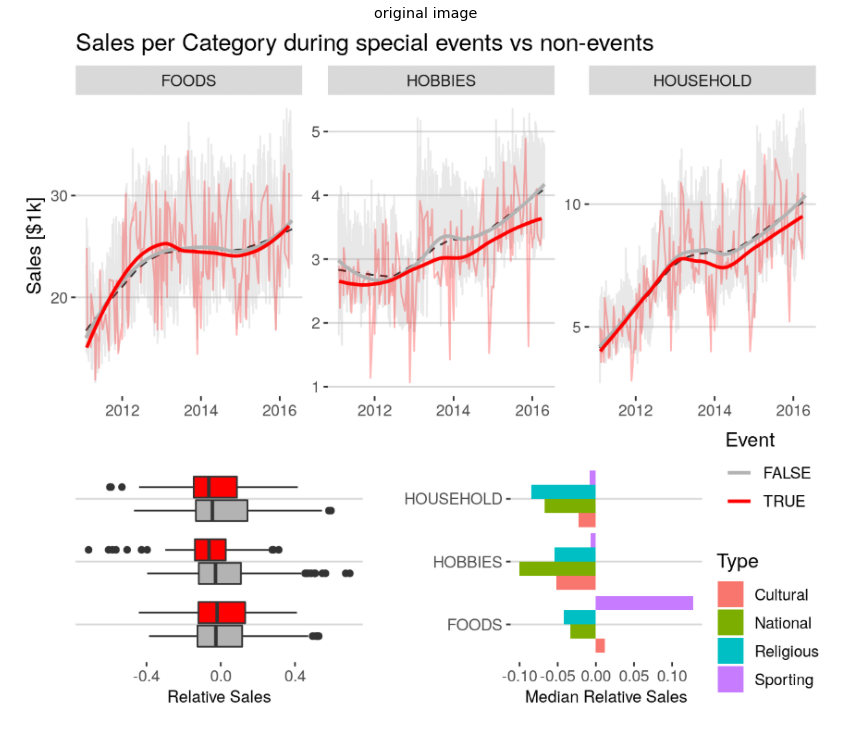

In [56]:
original_image('../input/figures/sales_cat_events.png')

気づいたこと：

「FOODS」の場合、イベント日の売上とイベント日以外の売上の平滑化(スムージングフィット)されたラインはほぼ同じですが、「HOBBIES」の場合、赤いイベントラインは常に非イベントの下にあり、「HOUSEHOLD」の場合は2013年以降同様です。（これは2013年以前の興味深い詳細ですが、これらの売上に実質的な違いはありませんでした。）

このイメージは左下パネルの箱ひげ図で確認できます。これは、全体売り上げの平準化ラインを差し引いた後の相対売上高を示しています。 「FOODS」の売上はイベント日と非イベント日で同等ですが、「HOUSEHOLD」と特に「HOBBIES」のイベント日売上は、非イベント日レベルを大幅に下回っています。

右下のパネルでは、タイプ別にイベントを分けて相対売上の中央値を確認します。最初に目にするのは、「Sporting」イベントの期間中、「FOODS」の売り上げが著しく高いことです。スーパーボウル(アメフト)のような大きなイベントに関連する食文化を考えると、これは理にかなっています。また、「Caltural」イベントの期間中、食品の純売上高はわずかにプラスになります。

一般に、「National(国家的)」イベントと「Religious(宗教的)」イベントはどちらも、販売量の相対的な減少につながります。 「National」イベントは「HOBBIES」カテゴリの方が悪く影響しますが、他の2つのカテゴリは「Religious」イベントの影響をわずかに受けます。 「HOBBIES」は、「Caltural」イベントでも売上減少していますが、「FOODS」と「HOUSEHOLD」の差は小さくなっています。「Sporting」は、「HOUSEHOLD」と「HOBBIES」に小さな影響を与えています。

このダッシュボードのような概要ビューの設計にはかなりの時間を費やしてきましたので、それを少し活用してみましょう。 3つの州に対応するプロットは次のとおりです。

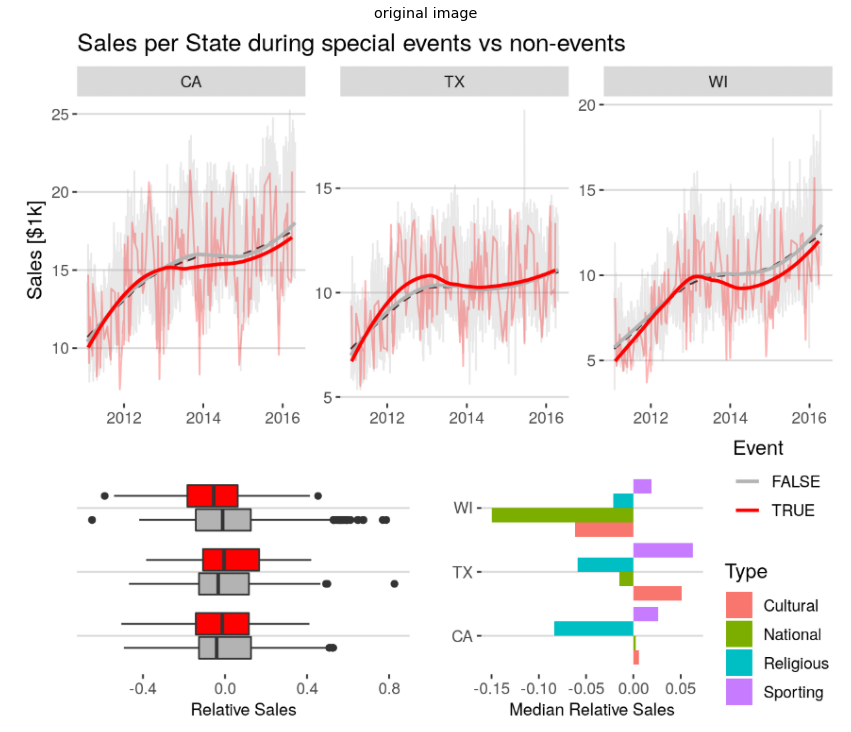

In [57]:
original_image('../input/figures/sales_state_events.png')

きづいたこと：

TXでは、2014年までイベント日が非イベント日をわずかに上回ります。その後は同じようです。 CAとWIもほぼ同時期に下落を示していますが、ここでは同じように売上が減少しています。これは2013年に始まる一般的なパターンのようです。

結果として、WIのイベント箱ひげ図は特に低い値にシフトしていますが、TXのイベント日では売上高をやや押し上げます。 CAはイベント日と非イベント日でほぼ同じです。これは、2014年以前と後で異なることに注意してください。

イベントタイプでは、特にWIで「National」イベントが売上高に大きなマイナス影響を与えており興味深いです。 WIは特にTXとは対照的に「Caultual」イベントの売上数が少ない唯一の州でもあります。一方で「Religious」イベントの影響は他の州と比べて最小ですが、それでもWIではマイナスの影響があります。 「Sporting」イベントは、各州に良い影響を与えています。

ここで州について、前述のSNAP日付も使います。このプロットではSNAP日と非SNAP日の平滑化ライン（スムージングフィット）を上部パネルに前回同様表示しますが、下部パネルには異なるプロットを追加しています。下のプロットはSNAP日と非SNAP日の売上の割合を示しています。SNAP日は各月の日数の約3分の1を占めるており、ここではSNAP日グループと非SNAP日グループの売上高をそれぞれ合計し、それぞれの日数で割っています。（訳注：おようするに、SNAP日の1日あたり平均売り上げ高と非SNAP日の1日あたり平均売り上げ高を算出し、2つの1日あたり平均売り上げ高を合計したものを100%として、どちらがどれだけ大きいか、SNAP日のインパクトがどれくらいかを示す比較図を作っている）

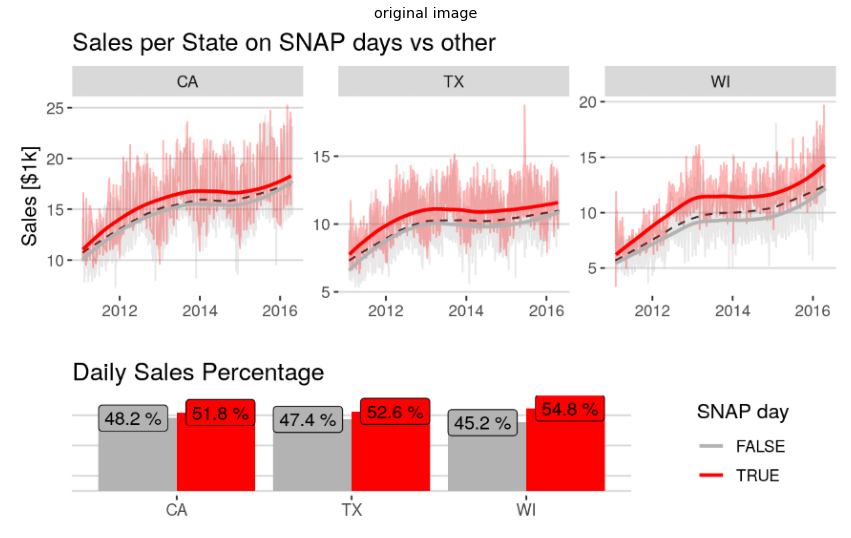

In [58]:
original_image('../input/figures/sales_state_snap.png')

気づいたこと：

SNAP日はすべての州で明らかに売上高が高くなっています。非SNAP日との差が最も大きいのはWIです。これは時系列プロットと1日あたり販売率の両方から明らかです。 CAの売上は2つのグループと同様ですが、SNAP日は依然として50％をほぼ2パーセント超えるポイントです。

時間の経過にともなって若干の変動があります。主にWIの場合、2つの曲線は2013年頃に差が最大に達しているようです。すべての平滑化と同様に、これらの曲線もデータ端付近は疑ってかかる(taken with a grain of salt)必要があります。

最後の2つの図を見た後の疑問は、販売カテゴリとSNAP日はどのように関係しているかということです。

SNAPの「N」は「栄養」を表すので、これらの利点が主に「FOODS」カテゴリーの購入に影響を与えると単純に予想できます。ただし、SNAP日のためにショッピングに来人のパターンとして、そこにいる間に他のアイテムも購入する可能性が高いことにも注意してください。

データが何を示しているか見ていきましょう。SNAP日は州に依存するため、カテゴリーおよびSNAPで集計する前に、まず州レベル（および日付）でデータをまとめる必要があります。最初に、SNAP日と非SNAP日の日次売上パーセンテージを確認してから、曜日vs月のヒートマップをプロットします。ヒートマップの値は、SNAP日の相対売上の合計から非SNAP日の相対売上の合計を引いた差を示しています。数値が正の場合、この月、この曜日のSNAP日の売上が増えています（全体のボリュームで正規化しています）：

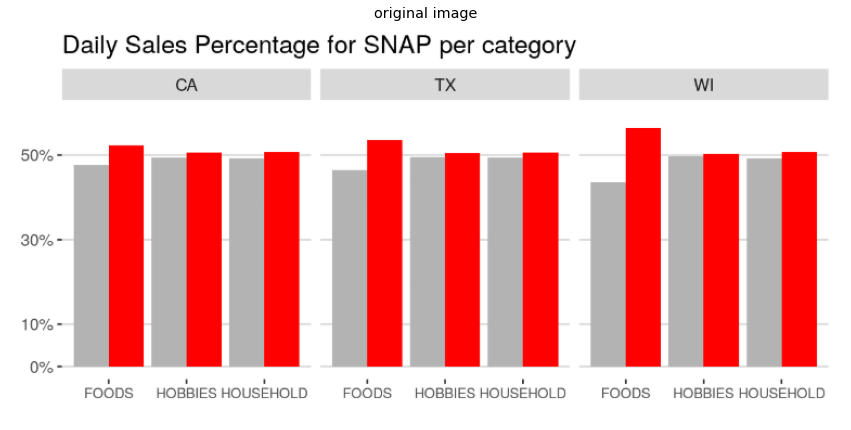

In [59]:
original_image('../input/figures/daily_sales_snap.png')

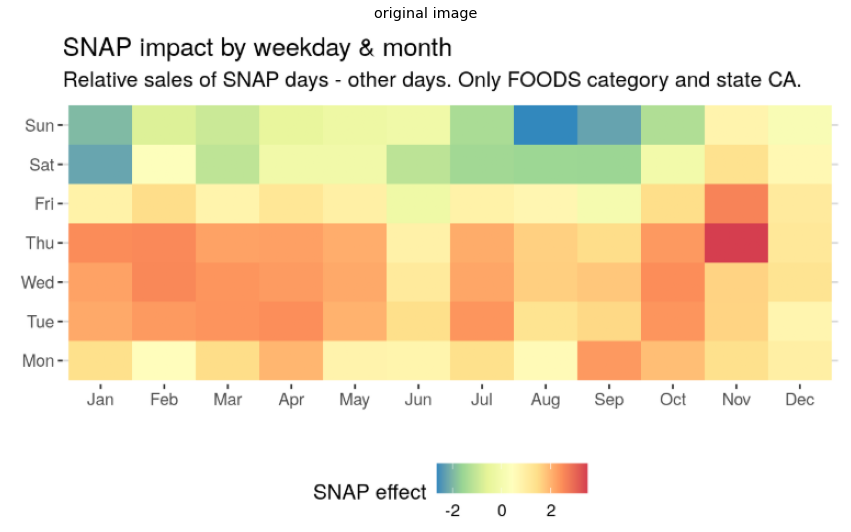

In [60]:
original_image('../input/figures/snap_impact.png')

気づいたこと：

予想通り、最大の影響は「FOODS」カテゴリーです。特にWI。ただし他のカテゴリにもわずかな相乗効果があることを示す兆候があります。

ヒートマップは「FOODS」とCAに焦点をあてています（CAが全体として最大の販売数を持っているため）。全体的に、月曜から金曜までの営業日は、土曜と日曜の週末よりもSNAPの購入によるメリットが強いことがわかります。

11月の木曜日が際立っています。この影響はSNAPと感謝祭(Thanksgiving)によるものと思われます。感謝祭は毎年11月の第4木曜日に祝われます。ここで、この休日は「その他」の購入を減らし（訳注：旅行などによって？）、SNAP効果が特に高く現れていいます。

ここで注意しなければならない注意点の1つは、SNAP日は常に毎月の前半であることです。理想的にはSNAPと他の効果ではなく、月の前半と後半の影響可能性、もしくは感謝祭のような休日の影響可能性も考える必要があります。

# 6 Individual time series with explanatory variables

説明変数の全体への影響がわかったので、時系列の例をいくつか見て、個々の効果について考えていきます。

3つ時系列データをランダムに選択します。次に、その販売数を抽出し、SNAPフラグを使用してカレンダーイベントを結合します。 これを効率的に表示する方法を考えてみましたが、私の現在の推奨戦略は以下とおりです。SNAP日か非SNAP日かを示す灰色長方形を背景として、販売数を折れ線グラフとしてプロットします。 次にイベント日をブラックポイントとして追加しています。これよりエレガントにプロットできる方法があれば教えてください。

SNAP期間に焦点を当てるため、このプロットでは2015年5月から9月の期間を見ていきます。3つの異なる図は、3つの州と3つの販売カテゴリーをカバーしています。 前述のように州によってSNAP日が異なることがわかります。 CAのみ10日間の連続SNAP日があります。

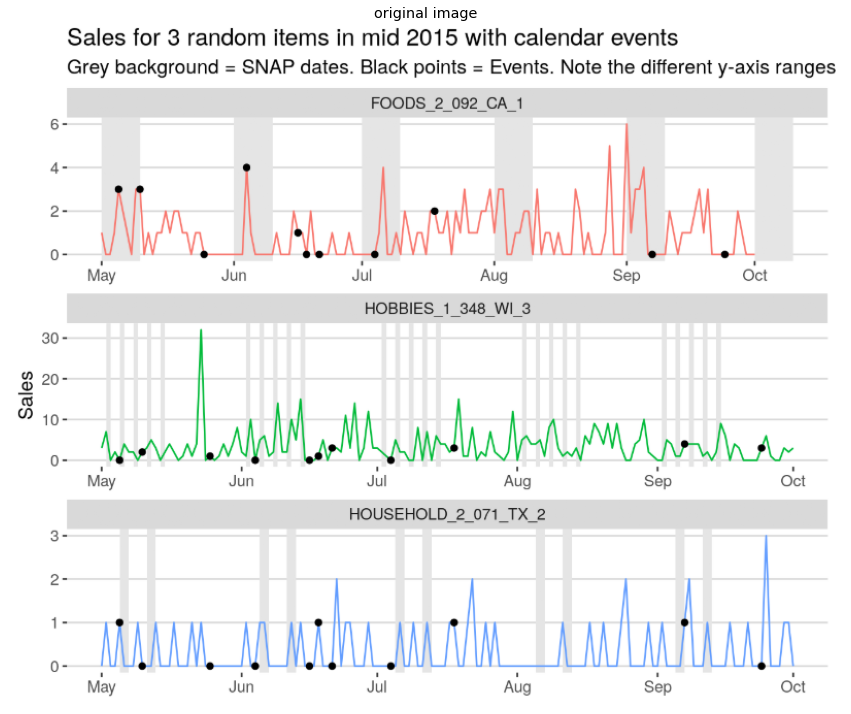

In [61]:
original_image('../input/figures/sales_3items_2015_events.png')

気づいたこと：

「FOODS」アイテムの場合、SNAP期間中のより多く売れます。先のSNAPヒートナップで見たように、これはもちろんSNAP効果のみでは証明できません。むしろ、これらのパターンがどのように現れるかを示す例としましょう。 「HOBBIES」アイテムと「HOUSEHOLD」アイテムの場合、SNAP日が特定の売り上げを押し上げているという兆候はありません。

Sales per State during special events vs non-events図で、イベントの影響はとても複雑であることがわかりました。わかりやすくするために、このプロットでは異なるタイプのイベントを区別していません。イベントの日に売り上げ急増している場合があります（6月上旬の「FOOOS」など）。また、イベントの前（5月下旬の「HOBBIES」）またはその後（7月4日以降の「FOODS」）に急増する場合もあります。その他のイベントとカテゴリの他の組み合わせでは特定の影響がないように見えます。

同様の方法で価格の変化を見ることができます。ここでは、最初に、変化点を見つけることで、価格が一定のの間隔を抽出します。

次に、これらの間隔とそれらの価格を、3つのサンプルアイテムの販売情報に結合します。価格変更はより長い時間範囲で発生するため、ここでは、上記の数か月だけに焦点を当てるのではなく、トレーニングデータ全体の時間範囲で見ていきます。実験的に時系列の背景色として価格をエンコードする視覚化を行いました。販売数が変わった時に、価格が上昇するか下降するか識別するためのアイデアです。

このプロットでは、明るい色ほど価格が低くなっています。各アイテムでは価格帯が異なることに注意してください。

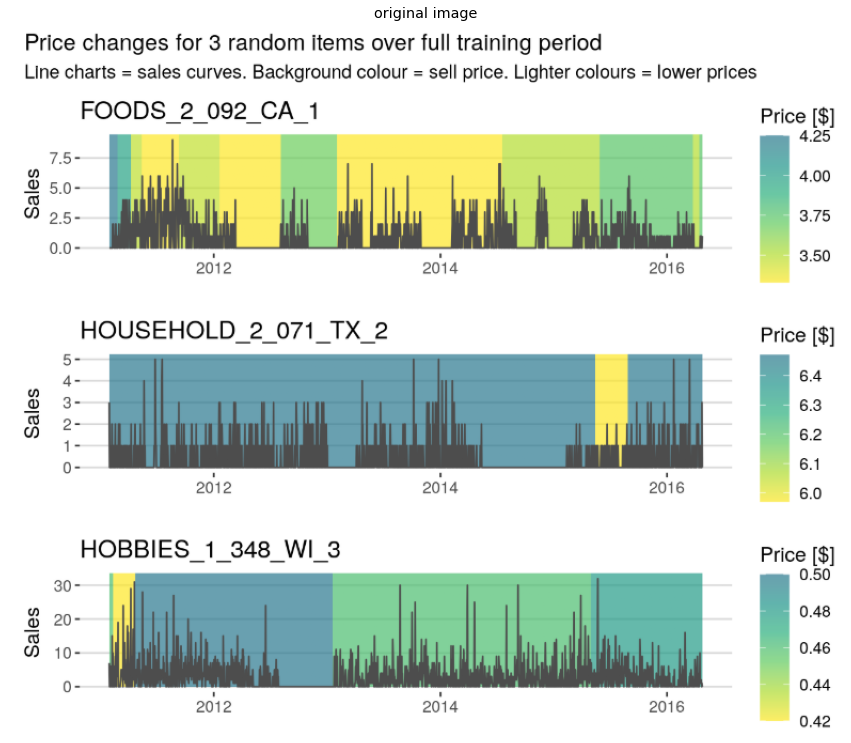

In [62]:
original_image('../input/figures/price_3items_full_period.png')

気づいたこと：

いくつかのアイテムは他より頻繁な価格変更があります。とある「FOODS」製品は価格を約10倍変更していますが、一方、「HOUSEHOLD」アイテムは、価格が低い期間が1つだけあり、その後、元の価格に戻ります。

ここでの主なポイントは、いくつかのケースにおいて、価格の変化が売り上げゼロのギャップ後の需要増と相関しているということです。例として2013年のほぼ同じ時期、「FOODS」アイテムの販売と「HOBBIES」アイテムの販売があげられます。どちらの場合も、ギャップで変化する価格は、一定の期間（1日または2日ではなく）続く販売増が一致ています。ただしこのデータは、これら価格変化に伴って（価格よりももっとインパクトがあるかもしれない）広告努力があったのかどうか、については何も語っていないことに注意してください。

「FOODS」アイテムと「HOBBIES」アイテムに関しては、時系列データの初期部分で、価格の低下と販売数の多少の増加が一致するという証拠もいくつか見られます。これらは現時点での時系列データの例にすぎないことに注意してください。

別のプロットにまとめてみましょう。（オリジナルはインタラクティブです）

ここで、縦の灰色の背景の縞はSNAP日付を示します。黒い点は、図18のようなイベントです。オレンジ色の太い線は、相対値にスケーリングされた販売価格を示し、販売数はy軸で示されます。

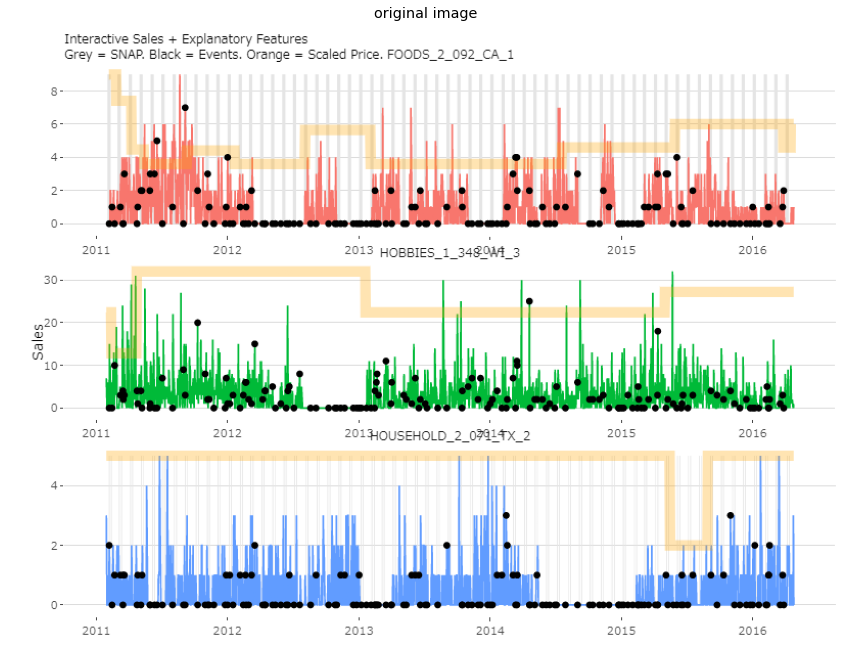

In [63]:
original_image('../input/figures/sales_features.png')

ここでは3つのサンプルアイテムを示したにすぎません。このコード（訳注：オリジナルのRスクリプト）を自由に使ってて関心のある、またはモデルで問題を引き起こしている可能性がある他の時系列データを探索してみてください。 奇妙なパターンや予期しないパターンが見つかれば、具体的例を知りたいと思っています。

# 7 Summary statistics

個々の時系列データの詳細ビューから概要統計に大きくジャンプしましょう。 ここでは基本パラメーターのセットを用いて、時系列データのサンプルをパラメーター化しようと試みます。

クイックに分析を行うため、ランダムな5,000時系列データのみを見ていきます。 下記の売上高0の分布と、それに対応する全体の分布図（セクション３の"Density for percentage of zero values - all time series"）とを比較することにより、統計的に合理的代表であることがわかります。

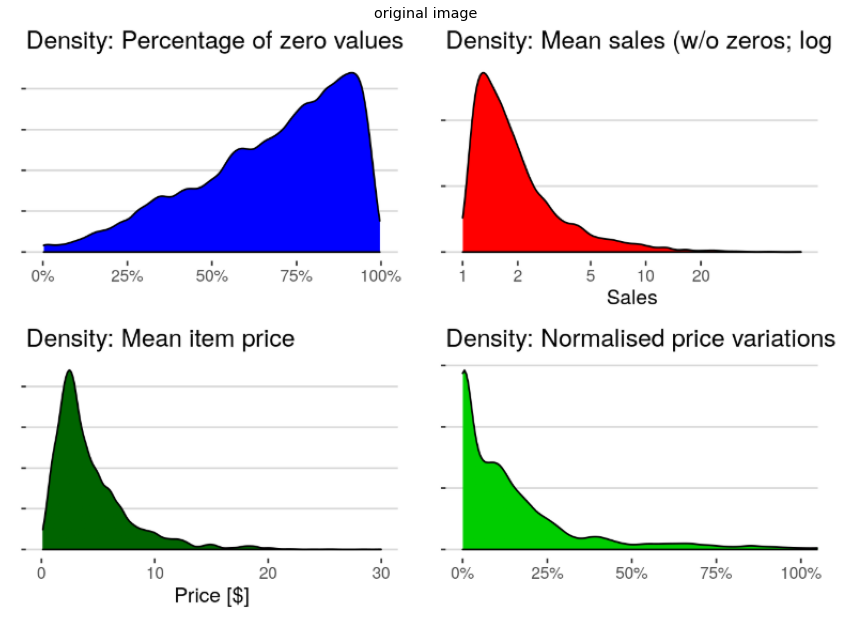

In [64]:
original_image('../input/figures/density_zero_mean_sales.png')

気づいたこと：

このNotebookの冒頭で、多数のゼロ値について簡単に説明しました。ゼロが25％未満の時系列データはごく一部でしかないことを忘れないでおいてください。またゼロが50％未満であっても、あまり多数派ではありません。

ゼロを除いたとしても、1日の平均販売数はかなり少なく、1から2ユニットの間です。ただし平均販売数が5や10ユニットを超えるものが小さい割合ですがが存在します。これは個々の時系列データにおいて、全体的に数が少ないという性質があることを示しています。

価格統計は濃い緑のグラフで示されています。平均商品価格は主に0〜10ドルです。ピークは2〜3ドルです。今まで見てきたように、価格はカテゴリーに大きく依存します。

薄緑色のグラフはアイテムの価格変動を視覚化しています。ここで表示されているのは、最大価格と最小価格の差を平均価格で割ったものです。ほとんどの価格はそれほど変動せず、平均値の25％未満です。興味深い部分に焦点を合わせるため、x軸を100％で切り取りましたが、まれに200％を超える例もあります。

販売数ゼロにもう少し時間をかけてみましょう。重要なことに、これらのインスタンスは時系列データの特性について多くのことを教えてくれます。ここで年ごとに分類し、ゼロの割合（上記のプロットと同じ）と最初の非ゼロ販売の年を調べます。

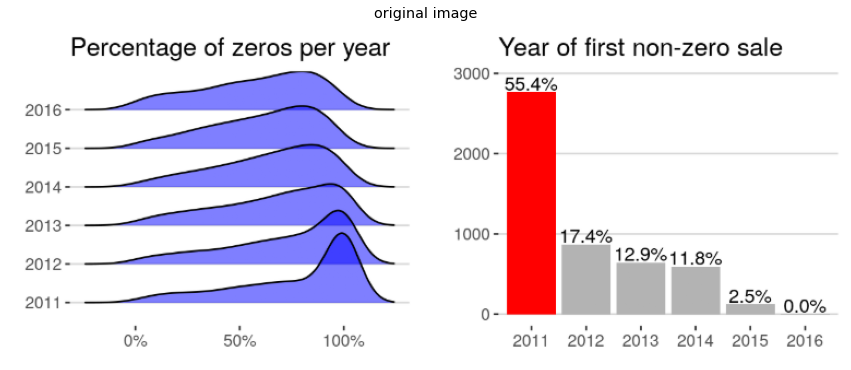

In [65]:
original_image('../input/figures/percentage_zero_year.png')

気づいたこと：

年間のゼロ値の割合は、最初の2年間（2011年と2012年）が残りの4年間と大きく異なります。 これは、対象とすべき時系列データは、実際には2013年からのみ始まることを示しています。

これは、最初のゼロ以外のエントリの年を見ることで確認できます。2011年はゼロを含まない最初の販売比率が大きいですが、それはすべての50％強を占めています。 2012年と2013年を合わせると、すべての時系列データの開始点の約30％を占めます。 5000個サンプルの中には、2016年に始まる時系列データは2つしかありませんでした。

同様の分析を暦月ごとに行うことができます。 ここでの焦点は少し異なります。開始年を見て時系列データがどのように（不完全）であるかを判断する代わりに、販売活動が低い暦月と高い暦月を調べます。

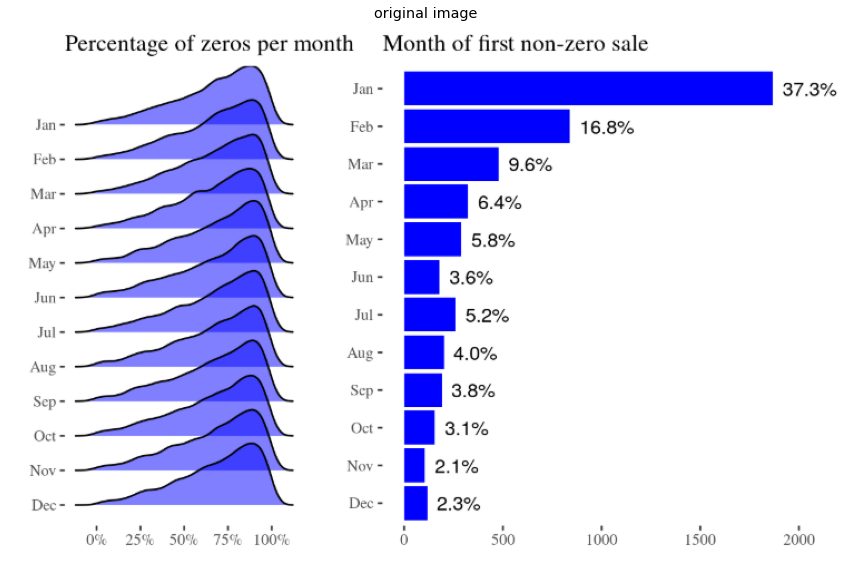

In [66]:
original_image('../input/figures/percentage_zero_month.png')

気づいたこと：

各販売時系列データのゼロ含有率の暦月ごとの分布という点では特に目立つ月はありません。一度はみておくべきですが。

最初のゼロ以外のエントリの月を示す右側のパネルは、はるかに興味深いです。 データは2011-01-29に始まることに注意してください。最初の年には、時系列が最初のゼロ以外のエントリを持つ可能性があるのは3日だけです。 また、2011年に最初にエントリーしていた時系列データは全体の55％だけと言うのもわかっています。

これを明確にするためにヒートマップが必要です。

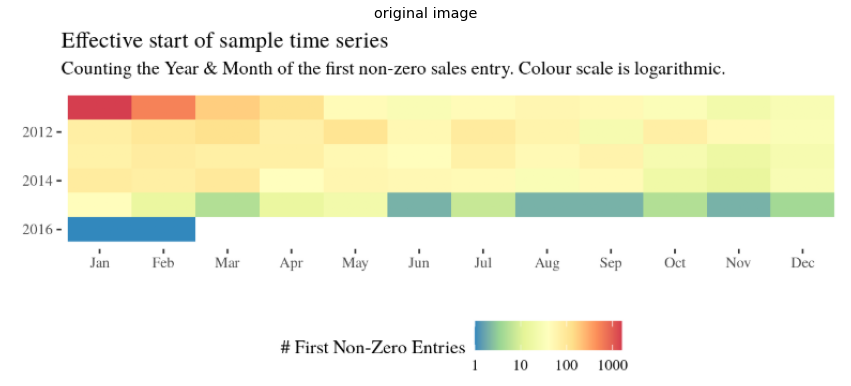

In [67]:
original_image('../input/figures/effective_start.png')

気づいたこと：

サンプルデータにおいて最も多い有効開始月は2011年1月です。3日分のデータしかないにもかかわらず。

また、2012年から2015年にかけて、5月と7月は6月を挟んで一定のエッジがあることがわかります。これは上記のMonth of first non-zero sale図と一致しています。我々の最終Evaluation予測期間が2016年6月であるため、これは熟考に値する興味深い視点です。

同様に12月は11月に比べて上昇していますが、これはホリデーセールによるものと思われます。

もちろん、この疑問を頭に入れておいて、有効期間の最終日の観点から見ることができます。「Heads or Tails」視点です。;-)

実際には、これは単に開始日ではなく終了日としてゼロ以外の年/月を探すことを意味します。他はすべて同じままです。またタイルの色の上に数字を追加します

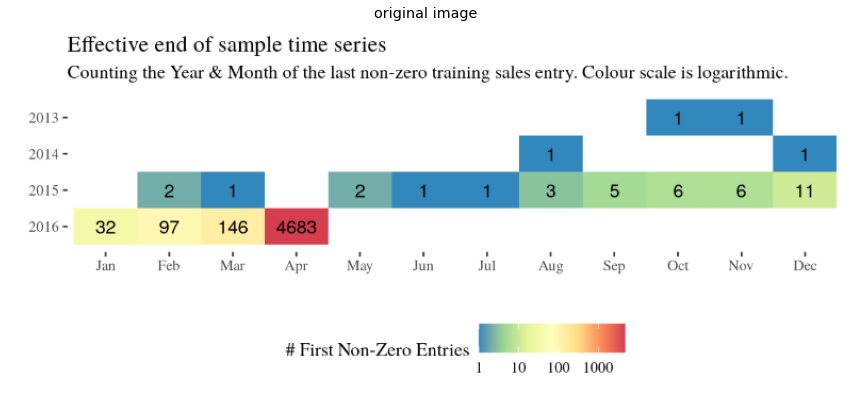

In [68]:
original_image('../input/figures/effective_end.png')

気づいたこと：

時系列データの大部分は、平穏に2016年4月まで続きます。ただし終了日が4月より前の時系列データは約250個（つまり5000個のの5％）あります。これは、これらのアイテムが2016年5月または6月に売上がないことを意味している訳ではありませんが、予測に影響します。

2016年の売上高のない時系列の総数は少ないですが存在しています。

最後に価格の変化を見てみましょう。このセクションの最初の図では価格変動の大きさを視覚化しました。ここではそれらの頻度と方向を比較します。

まずカテゴリごとの価格変更の数を見てみましょう。これはアイテム価格が変更された回数をカウントし、「FOODS」、「HOBBIES」、「HOUSEHOLD」の3つのカテゴリの分布をプロットします。次にこれらの価格変更の方向を調べます。価格が増加する頻度を数え、この値を変更された合計価格のパーセンテージとしてプロットします。 50％未満の値上げ率は、値下げが多くあったことを示します。

価格の上昇率を表示するには、右側のバイオリンプロットを使用します。これにより、分布の形状を維持しながら、グローバル四分位数(the global quartile measures)が得られます。多くのアイテムの価格変更回数は数回しかないので、基礎となるデータはやや離散的です。しかし、バイオリンの密度は、分布の形状の違いを視覚化するのに非常に適しています。カテゴリー別および州別の価格上昇率を比較できます。

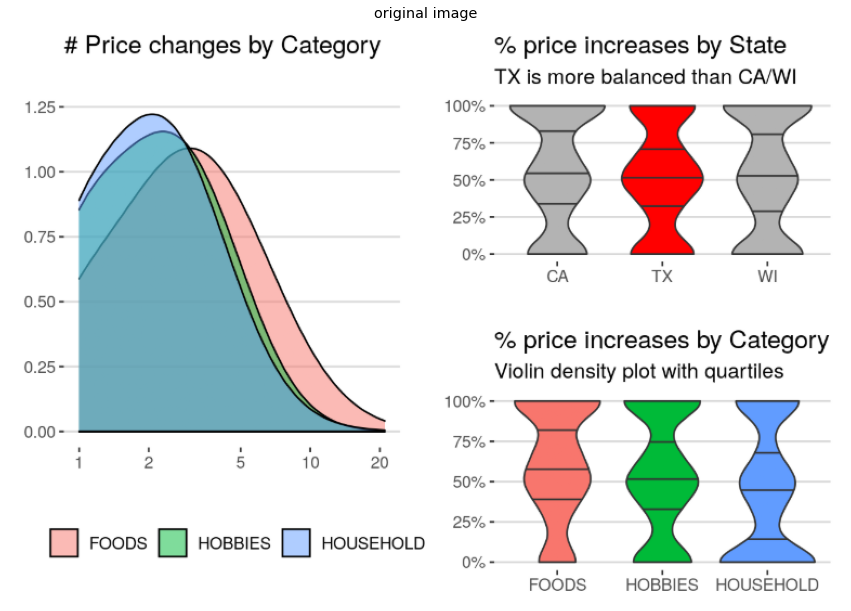

In [69]:
original_image('../input/figures/price_changes_cat.png')

気づいたこと：

「FOODS」アイテムは頻繁に価格変更しているようです。 全体として価格変更回数が10を超えるアイテムははまれです。

また「FOODS」カテゴリの商品は時間の経過とともに価格が上がる可能性が高く、「HOUSEHOLD」の商品は価格が若干下がる傾向にあります。 「HOBBIES」カテゴリは多かれ少なかれ高価になるアイテムの間でかなりバランスが取れています。

3つの州の間では、TXのみが価格の上昇と下降のバランスの取れた分布を示しています。 CAとWIはどちらも、時間の経過とともに値上がりする方向に少し偏っています。

私たちのデータは複数年をカバーしており、インフレが重要であることを考えると、時間とともに世界的に価格が上昇すると予想していました。 データがインフレとは違うものを示している事実は確かに注目に値します。

# 8 One more thing: External Dataset of Natural Disasters

このボーナスセクションでは、外部データセットを分析に含める方法を示します。このコンテストでは、このようなすべてのソースがこの[summary thread](https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/133468)にリストされているという条件の下、外部データを許可します（すべてのコンテストで許可されているわけではありません）。

私は米国の自然災害宣言のデータセットを[Kaggleデータセット](https://www.kaggle.com/headsortails/us-natural-disaster-declarations)に提供しています。連邦緊急事態管理局（[FEMA](https://www.fema.gov/)）のWebサイトからダウンロードした後、前処理しました。使用する場合は、データセットへのupvote検討お願いします。

FEMA全データセットは1953年まで遡り、最近の生物学的緊急宣言（別名COVID-19）に関する情報も含まれています。 この情報は、COVID-19モデルにとって有用でしょう。 さらに、ファイルfema_disasters_m5.csvも提供します。これは、コンテンツをCA、TX、WIの3つ州に制限し、コンペ時間枠外のイベントを除外し、このコンテストのために特別に準備しまして、下記に視覚化しました。

データセットからM5コンペ用災害データを読み込みましょう。

Features(特徴変数)は下記の通りです。

In [70]:
## Rows: 627
## Columns: 14
## $ disaster_number     <dbl> 2862, 2863, 2864, 2865, 2867, 2870, 2870, 2881, 2…
## $ state               <chr> "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "…
## $ declaration_type    <chr> "FM", "FM", "FM", "FM", "FM", "FM", "FM", "FM", "…
## $ declaration_date    <dttm> 2011-02-28 03:12:00, 2011-02-28 03:25:00, 2011-0…
## $ incident_type       <chr> "Fire", "Fire", "Fire", "Fire", "Fire", "Fire", "…
## $ declaration_title   <chr> "Willow Creek South Fire Complex", "Matador Fire"…
## $ ih_program_declared <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
## $ ia_program_declared <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
## $ pa_program_declared <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
## $ hm_program_declared <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1…
## $ incident_begin_date <dttm> 2011-02-27 05:00:00, 2011-02-27 05:00:00, 2011-0…
## $ incident_end_date   <dttm> NA, NA, NA, NA, 2011-03-17 04:00:00, 2011-03-17 …
## $ fips                <chr> "48375", "48345", "48381", "48335", "48237", "480…
## $ designated_area     <chr> "Potter (County)", "Motley (County)", "Randall (C…

ポイントとして：

disaster_numberは連続したカタログ番号です。stateは「CA」、「TX」、「WI」のいずれかです。declaration_type  は、「DR」（=大災害）、「EM」（=緊急管理）、または「FM」（=「火災管理」）のいずれかです。 「大災害」が「DR」と略される理由を私に尋ねないでください。

fipsとDesignated_areaの列は、同じstateで時間的にオーバーラップした宣言に対して、（disaster_number以上の）もう少しコンテキスト情報と識別情報を提供するために含まれています。 M5データには、州レベルを超える地理的空間解像度はありません。

Incident_typeとDeclaration_titleは、これがどのような災害であるか（例："Fire"）、どのような災害が発生したか（例：“Gage Holland Fire”）を示します。

_program_declaredで終わる4つの機能は、この災害で特定の援助プログラムがトリガーされたかどうか（1/0）を示すフラグです。

日時特徴量のdeclaration_date、incident_begin_date、およびincident_end_dateは、一目瞭然です。インシデントの始まりと災害の宣言の日付は異なる場合があります。

詳細については、[データセットの説明](https://www.kaggle.com/headsortails/us-natural-disaster-declarations)を参照してください。

いくつかIncident_end_dateが不明なインスタンスがあります。それらについて、ここでは、終了日と開始日を同じにすることにより、1日という非常に控えめな期間を想定しています。これらの欠損値を補完する他のより方法は試してもいいと思います。

stateごとに集計した売上データを準備し（セクション4.3と比較）、対応するstateと期間で米国の自然災害データと結合します。 日付を外部データセットの開始時刻と終了時刻に合わせるため、[fuzzyjoinパッケージ](https://cran.r-project.org/web/packages/fuzzyjoin/index.html)のfuzzy_left_join関数を使用します。

結果は次のようになります。

In [71]:
## # A tibble: 5 x 5
##   state dates      sales disaster type 
##   <chr> <date>     <dbl>    <dbl> <chr>
## 1 WI    2013-10-13 11814        0 <NA> 
## 2 TX    2011-04-18  7218        1 Fire 
## 3 TX    2011-05-06  7924        1 Fire 
## 4 TX    2011-10-07  9630        1 Fire 
## 5 CA    2013-06-18 14223        0 <NA>

私たちstateごとの販売データを持っています。そのtraining, validation, evaluation期間中の災害宣言フラグを追加し、災害のタイプ（テキサス州火災など）をリストしました。

データの自然災害の期間とタイプの頻度について理解するため、災害日数のパーセンテージ（災害がどの期間にどのstateで宣言されたか）と各stateでの災害タイプの頻度カウントをプロットします。 この最初のoverviewでは、コンペデータの日付範囲だけでよいため、training, validation, evaluation期間においてプロットを生成しています。

上図では、1つまたは複数の宣言（または型）を持つ日付を区別していませんが、下図では、個々の日付を複数回カウント(同じ日に複数宣言あれば)しています。

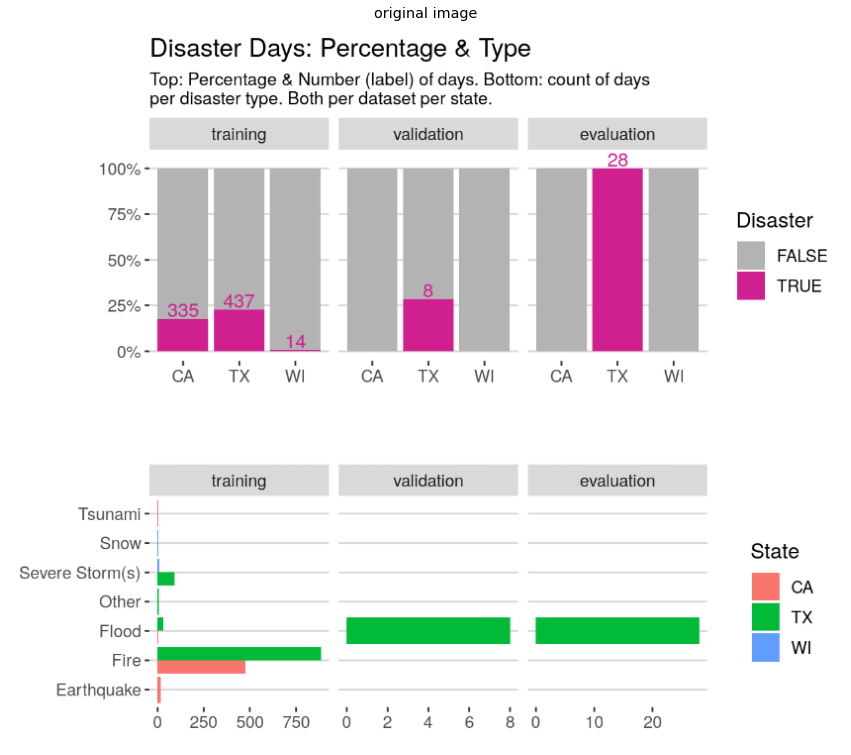

In [72]:
original_image('../input/figures/disaster_days.png')

気づいたこと：

- training期間中の自然災害宣言の顕著な割合がCA（約18％）と特にTX（約23％）にあります。一方WIに自然災害はほとんどありません。

- ただし、より興味深いのはvalidationとevaluation期間です。validation期間中、テキサス州にはすでに8つの災害日（つまり約25％）がありますが、さらにevaluation範囲全体においてテキサス州で自然災害が発生していました。 CAとWIは影響を受けません。

- validationおよびevaluation期間中の災害のタイプは、TX州の洪水とCA州の火災です。特にCAの火災はtraining期間も頻度多いですが、その期間中のTXでは、洪水よりもはるかに多くの火災宣言があります。

これらの数値は潜在的に影響を与える可能性がありますが、特に重要なevaluation期間中は、いくつかの注意点があります。

- 火災や洪水などの自然災害は比較的ローカルなイベントであり、課題となっている州は非常に大きい（特にテキサス州）。完全な災害テーブルは、郡レベルまでの地理的解像度を提供しますが、M5データには、州に関する情報しかありません。したがって、これらの店舗が正確にどこにあるのかがわからなければ、特定の災害による予測影響を判断するのは困難です。それでも、追加情報は有用であり、創造性が奨励されます。

- 通常、災害がいつ発生するかは事前にわかりません。私たちの仕事は、問題の予測期間の直前に得ていたであろう情報のみを使用して予測を行うことです。ただしvalidationとevaluation期間はどちらも非常に短く、火災や洪水のようなイベントは（残念ながら）数日以上続くことがあります。さらにtraining期間中の自然災害には考慮すべき影響があったかもしれません。

- validationおよびevaluation期間中のTX洪水のような特定ケースについてですが、この自然災害は2016-05-22に始まりました。つまり、validationデータ範囲の最終日です。どのくらい続くかわからないイベントですが、この日は、（地理的に近い場合）販売データに影響があると思います。（訳注：6/1 公開されたvalidation dataのTX販売データをよくチェックするべきでしょう）

次に前に使ったレイアウトを使用してみましょう。training期間中の売上に対するこれらの自然災害の影響を調査します。ここでは、他の2つの州と比較して災害日が数日しかないため、WIについては説明しません。これにより、すべての「雪」の日が削除されます。そもそも超レアな「津波」タイプも考慮しません。これにより、次のレイアウトが残ります。



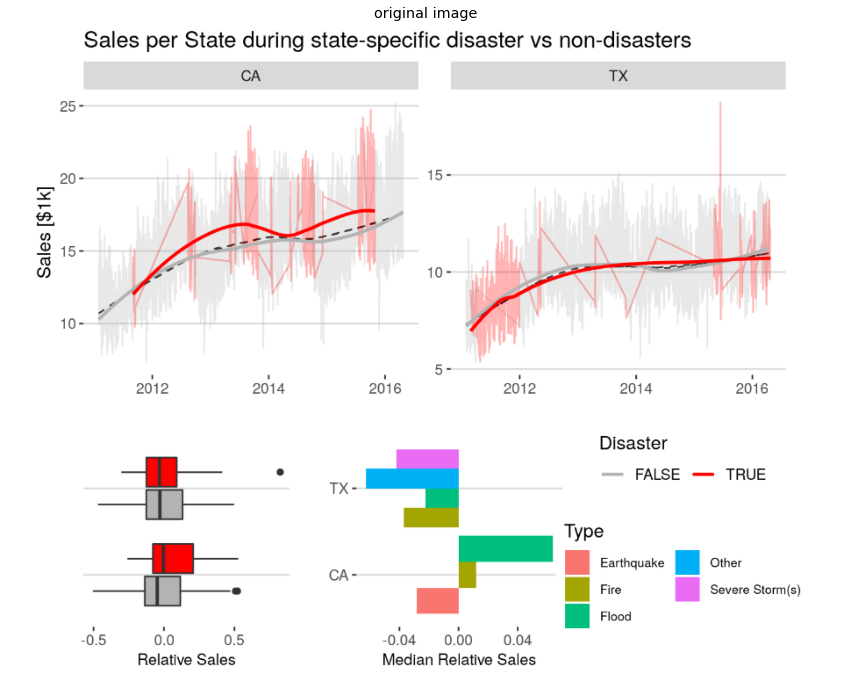

In [73]:
original_image('../input/figures/disaster_sales_per_state.png')

気づいたこと：

- 額面通り、CAの相対的な売上高は災害時に増加しました。ただし、CAの災害はほとんどが「火事」であり、これらの火事は通常、夏の長期間の干ばつの後に秋に発生することを考慮する必要があります。したがって、周期変動を災害固有のシグナルと混同しないように注意する必要があります。

- TX州では、平均的な災害と非災害時の売上はほぼ同等です。 2015年半ばに興味深いスパイクがあり、さらに分析する必要があります。もちろん、training期間終わりあたりの災害は特に興味深いものです。これらは、validationとevaluation範囲への流出（失礼、駄洒落です）が見られる「洪水」イベントである可能性があります。

- 右下パネルの災害タイプの内訳は、前図のタイプ頻度を考慮して読む必要があります。火災時CAの売り上げ増加についてはすでにコメントしました。 CAの洪水はまれであるため、この明らかに強い影響は、あまり関係のない異常値である可能性があります。地震の発生頻度はやや低いですが、かなり深刻な結果をもたらす傾向があるため、自信は予測への影響が大きくなる可能性があります。TX州では、嵐、火災、洪水がかなり長い日数発生するため、売上高に対する災害の負の影響は明らかです。

- type == "Other"カテゴリが最も影響が大きいように見えますが、発生頻度が非常に少ないため、注意が必要です。元のus_disastersテーブルを調べると、2013年4月に4日、緊急事態を引き起こした「爆発」があったことがわかります。おそらく深刻なイベントだったため、2つ緊急管理（EM）と大災害（DR）が同時に宣言されましたのでしょう。

| incident_type | incident_begin_date | incident_end_date | declaration_title | declaration_type |
| --- | --- | --- | --- | --- |
| Other | 2013-04-18 | 2013-04-20 | xplosion | EM |
| Other | 2013-04-17 | 2013-04-20 | xplosion | DR |

最後に、CAの火災とTXの嵐と洪水について詳しく見ていきます。

プロットを容易にするために、災害タイプの組み合わせごとに、個々のデータフレームを使いました。 次に前に使用したプロットスタイルを適用して、左側のパネルにFireデータを視覚化します。 右側のパネルは、それぞれTXの嵐と洪水について、特に興味深い1年(2015と2016)が示されています。 緊急時の売上高は色分けされています。 灰色は災害以外のものです。濃い灰色の破線は、前図におけるスムージングフィットを示しています。

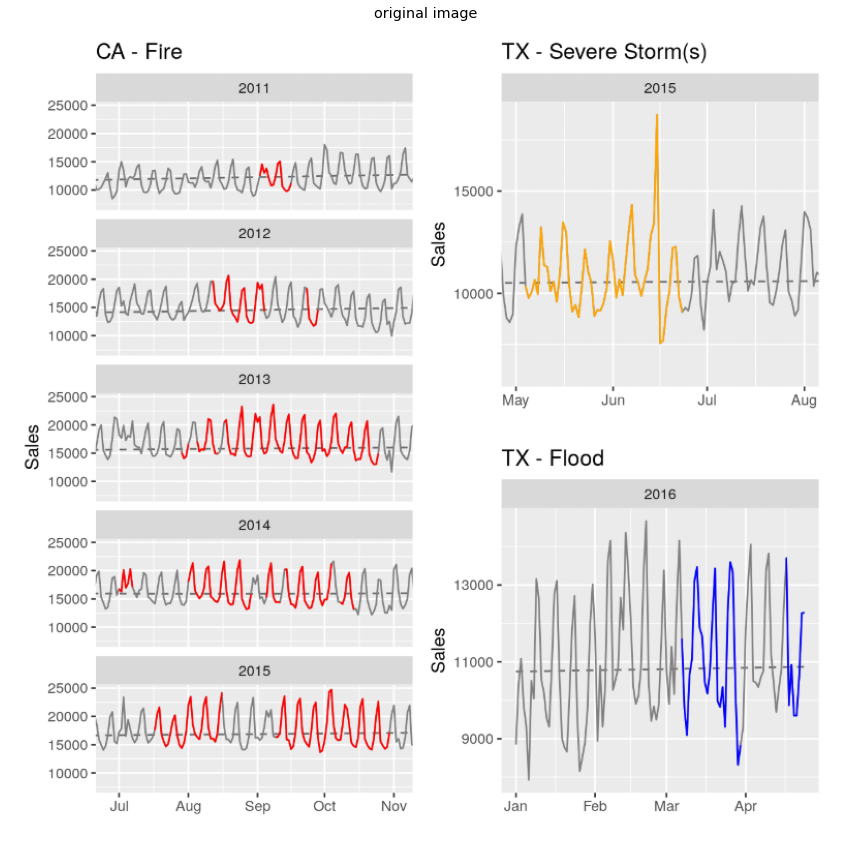

In [74]:
original_image('../input/figures/disaster_ca_tx.png')

気づいたこと：

- CAの火災は、その期間の、または他の年の非緊急時と比較した場合、売上に大きな影響を与えるようには見えません。ただし2011年と2012年は、10月頃に大規模な火災が発生しなかった年であることに注意してください。2014年7月初旬の二重ピークは、7月4日（独立記念日）の休日に関連している可能性があります。

- TXストームについては、2015年6月中旬に興味深いパターンが見られます。スパイクとそれに続く凹みは、全体的な時系列コンテキストにおいてかなり異常に見えます。

- TX洪水宣言、これらは2016年にのみ発生しました。最初は3月と4月（training期間）、次に5月と6月（validationとevaluation期間）です。 Googleをquick検索すると、これらの緊急事態は[ヒューストン地域](https://www.climaterealityproject.org/blog/central-texas-floods-may-june-2016)で発生したことがわかります。 3月の売上データは、全体的な傾向から大きく外れているようには見えません。月末の比較的深い落ち込みは興味深いかもしれませんが。 4月と5月は言うのが難しいです。私たちが自由に使える（6/1現在の）validationセットから追加28日間の販売データを見れば、より多くを知ることができるでしょう。

ついにこの探索的データ分析ノートブックを締めくくります-今回は本当です。賛成票とコメントの形で素晴らしいフィードバックを送ってくださった皆さん、ありがとうございました！ 皆さんのご支援に感謝します。私の仕事があなたにとって役立つことをうれしく思いますし、私は常に質問や建設的な批判を待っています。

このコンテストの最後の月では、追加のトレーニングデータが取得できますが、Live Leader Boardのスコアは失われます。このスイッチに関連するすべての変更を包括的なフォーラム投稿にまとめました。

皆さんにとって最高の成功がありますように！楽しんでください！